In [ ]:
# lets slice `ref` and `hist` for 1979 to 2014
hist = ds_hist.sel(time=slice('1979','2014'))
ref = ds_ref.sel(time=slice('1979','2014'))
print((f'lenght of GCM Historical data is : {len(hist.time.values)}'))
print((f'lenght of Reference Observation data is : {len(ref.time.values)}'))

In [1]:
import xclim
# Also import some submodules for direct access
from xclim import sdba  # Bias-adjustment

# Data manipulation
import xarray as xr
import xclim.testing
import numpy as np

# Regridding / interpollatiion of grids
import xesmf as xe

# Visualizations and display
from pprint import pprint
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
# Visualization of Cartographic Maps
import cartopy.crs as ccrs

# For handling file paths
import os

In [2]:
# keep attributes for all datasets
xr.set_options(keep_attrs=True)

In [3]:
os.chdir('/mnt/project/input/gcm')

In [4]:
fn ='tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18500101-20141231.nc'

fn1 = 'tas_day_GFDL-ESM4_ssp245_r1i1p1f1_gr1_20150101-21001231.nc' 

fn2 = '/mnt/project/input/output/era5/era5_tas_to_gfdl_conservative.nc'

In [5]:
fn3 = 'tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231.nc'

fn4 = '/mnt/project/input/output/era5/era5_tas_to_gfdl_patch.nc'

fn5 = '/mnt/project/input/output/era5/era5_tas_to_gfdl_bilinear.nc'

In [6]:
# load GCM historical dataset
ds_hist = xr.open_dataset(fn)
ds_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 60225, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/79682180-be0c-4dfd-b62e-a66fa49a48df
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [7]:
# load GCM Simulation ssp245 dataset
ds_sim = xr.open_dataset(fn1)
ds_sim

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/a94e308e-7b1b-4a67-a21a-aa57eb88f207
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [8]:
# load reference (Observation) dataset
ds_ref = xr.open_dataset(fn2)
ds_ref

<xarray.Dataset>
Dimensions:  (time: 15341, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  conservative

In [9]:
ds_hist.tas.isel(time=2,lat=2,lon=2)

<xarray.DataArray 'tas' ()>
array(299.491211)
Coordinates:
    height   float64 2.0
    lat      float64 3.5
    lon      float64 -15.62
    time     object 1850-01-03 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [10]:
# re-assign Dimension name attribute
ds_ref['tas'] = ds_ref.tas.assign_attrs(long_name='Near-Surface Air Temperature')
ds_ref['tas'] = ds_ref.tas.assign_attrs(units='°C')
ds_ref['tas'] = ds_ref.tas.assign_attrs(standard_name='air_temperature')
ds_ref['tas'] = ds_ref.tas.assign_attrs(interp_method='conservative')
ds_ref

<xarray.Dataset>
Dimensions:  (time: 15341, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  conservative

In [11]:
# convert Reference Dataset to DataArray
ds_ref = ds_ref.tas
ds_ref

<xarray.DataArray 'tas' (time: 15341, lat: 30, lon: 30)>
[13806900 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [12]:
# `hist` and `sim` is given in Kelvin, we must convert to Celsius to fit with `ref`
ds_hist = xclim.core.units.convert_units_to(ds_hist.tas, 'degC')
ds_sim = xclim.core.units.convert_units_to(ds_sim.tas, 'degC')
ds_sim

<xarray.DataArray 'tas' (time: 31390, lat: 30, lon: 30)>
array([[[26.893707 , 26.827667 , 26.792786 , ..., 23.352448 ,
         23.621979 , 24.20691  ],
        [26.997833 , 26.956604 , 26.890442 , ..., 21.92694  ,
         23.145538 , 23.989655 ],
        [27.079468 , 27.05606  , 26.992523 , ..., 21.678986 ,
         22.270569 , 23.374115 ],
        ...,
        [17.754639 , 17.022125 , 17.386414 , ...,  6.8992615,
          7.022156 ,  7.6949463],
        [17.632751 , 17.549652 , 17.590149 , ...,  7.001587 ,
          6.7807617,  6.8317566],
        [17.294525 , 17.16922  , 17.256134 , ...,  7.231201 ,
          7.425598 ,  9.0000305]],

       [[26.854187 , 26.801086 , 26.766418 , ..., 24.927002 ,
         24.824951 , 24.797394 ],
        [26.960175 , 26.90271  , 26.834198 , ..., 23.798615 ,
         24.694672 , 25.214508 ],
        [27.058167 , 27.038055 , 26.95459  , ..., 23.493164 ,
         23.885986 , 24.596252 ],
...
        [20.440796 , 19.702911 , 19.930511 , ..., 11.0590515,
         11.201172 , 13.328888 ],
        [20.344635 , 20.835022 , 21.085571 , ..., 11.2578125,
         11.957855 , 14.268311 ],
        [19.695251 , 19.968384 , 20.245667 , ..., 13.102356 ,
         13.721527 , 15.794189 ]],

       [[28.236633 , 28.377686 , 28.434875 , ..., 23.428345 ,
         23.881348 , 25.228119 ],
        [28.192352 , 28.393524 , 28.391022 , ..., 22.373535 ,
         23.3779   , 24.327454 ],
        [27.931213 , 28.360474 , 28.594452 , ..., 22.456177 ,
         22.633942 , 23.797913 ],
        ...,
        [21.110107 , 20.42688  , 20.83078  , ..., 10.096649 ,
         10.230743 , 12.813416 ],
        [21.032074 , 21.135956 , 21.131989 , ...,  9.170898 ,
         10.620514 , 13.6604   ],
        [20.24176  , 20.287567 , 20.354218 , ..., 10.109833 ,
         12.28656  , 14.603058 ]]], dtype=float32)
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [13]:
ds_ref.time[59].data

array('1979-03-01T00:00:00.000000000', dtype='datetime64[ns]')

In [14]:
# lets slice `ref` and `hist` for 1979 to 2014
hist = ds_hist.sel(time=slice('1979','2014'))
ref = ds_ref.sel(time=slice('1979','2014'))
print((f'lenght of GCM Historical data is : {len(hist.time.values)}'))
print((f'lenght of Reference Observation data is : {len(ref.time.values)}'))

lenght of GCM Historical data is : 13140
lenght of Reference Observation data is : 13149


In [15]:
# Calendar conversion

# Convert the Reference data to `noleap` calendar
ref = xclim.core.calendar.convert_calendar(ref, 'noleap')
print((f'lenght of Reference Observation data is : {len(ref.time.values)}'))
ref.time[59].data

lenght of Reference Observation data is : 13140


array(cftime.DatetimeNoLeap(1979, 3, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

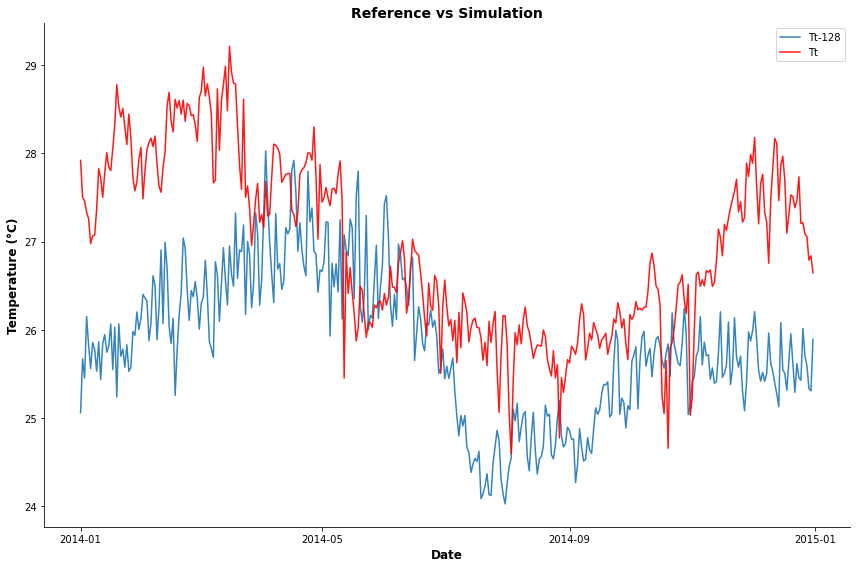

In [16]:
x = ref.isel(lat=2,lon=2,time=slice(-365,None))
y = hist.isel(lat=2,lon=2,time=slice(-365,None))
dt = ref.isel(lat=2,lon=2,time=slice(-365,None)).time
dt = x.time

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(dt,x, alpha=0.9)
axes.plot(dt,y, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Tt-128', 'Tt'])
# We plot
plt.show()

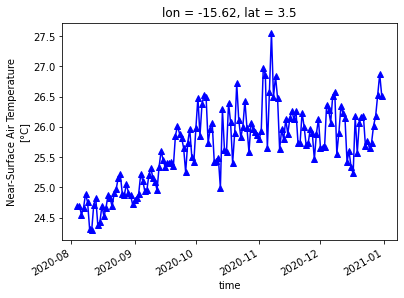

In [17]:
ds_ref.isel(lat=2,lon=2,time=(slice(-150,None))).plot.line("b-^")

In [18]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_doy_31 = xclim.sdba.Grouper('time.dayofyear', window=31)

In [19]:
QM = sdba.EmpiricalQuantileMapping.train(
    ref, hist, nquantiles=15, group=group_doy_31, kind="+"
)

In [20]:
scen = QM.adjust(ds_sim, extrapolation="constant", interp="linear")
scen

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 1.61617693, 12.90789552, 12.98665473, ...,  8.59997299,
          8.84548   ,  1.10546935],
        [ 3.22125715, 25.74796532, 25.90857068, ..., 16.67909373,
         17.61687261,  2.18430951],
        [ 3.21807927, 25.71119973, 25.85651533, ..., 17.27216817,
         17.46437841,  2.17172157],
        ...,
        [ 3.20829066, 25.0222182 , 24.42182828, ...,  8.52821779,
          9.24941122,  1.11928435],
        [ 3.20153353, 25.57406359, 25.1271428 , ...,  9.32853481,
          8.98818107,  1.10257131],
        [ 1.63169301, 13.05351633, 12.86963911, ...,  4.93671349,
          4.43833784,  0.53995405]],

       [[ 1.61353889, 12.89882178, 12.97556036, ...,  8.87608558,
          9.12630275,  1.14645729],
        [ 3.21800327, 25.70799701, 25.89301193, ..., 17.17166289,
         18.17138669,  2.257262  ],
        [ 3.2152853 , 25.6687654 , 25.83261064, ..., 17.35616006,
         17.8066901 ,  2.20372752],
...
        [ 3.46319546, 25.57632233, 25.48975817, ..., 12.51551274,
         13.33651195,  1.84437817],
        [ 3.6164126 , 26.21734039, 26.3420536 , ..., 13.32145995,
         14.00513505,  1.95913515],
        [ 2.53805594, 13.39552681, 13.78495883, ...,  8.02298857,
          8.57369281,  1.05037075]],

       [[ 2.4859328 , 13.88860951, 13.68924495, ..., 10.35433649,
         10.67815605,  1.36135679],
        [ 4.21098479, 27.34905459, 27.63716788, ..., 20.0170387 ,
         20.79943362,  2.68327437],
        [ 4.18027624, 27.47161442, 27.92289512, ..., 20.56403369,
         20.87209386,  2.70436361],
        ...,
        [ 3.21485928, 25.30508248, 24.82730234, ..., 11.56115804,
         11.47804475,  1.45589771],
        [ 3.22224491, 25.74740251, 25.35634306, ..., 12.46004749,
         12.56738551,  1.70422534],
        [ 1.87197802, 13.18222991, 13.0556768 , ...,  7.65688519,
          8.07961665,  0.95355817]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [21]:
scen_hist = QM.adjust(ds_hist, extrapolation="constant", interp="linear")
scen_hist

<xarray.DataArray 'scen' (time: 60225, lon: 30, lat: 30)>
array([[[ 1.55439592e+00,  1.21799399e+01,  1.21410499e+01, ...,
          7.16115833e+00,  7.13757217e+00, -1.94729795e-01],
        [ 3.04670259e+00,  2.44056648e+01,  2.46814203e+01, ...,
          1.46505059e+01,  1.53484623e+01,  6.89438674e-01],
        [ 2.92812200e+00,  2.43028676e+01,  2.46709081e+01, ...,
          1.54351019e+01,  1.51993108e+01,  5.87598426e-01],
        ...,
        [ 3.17762591e+00,  2.49142750e+01,  2.36131085e+01, ...,
          1.09519702e+01,  1.17459592e+01,  1.45943844e+00],
        [ 3.15738155e+00,  2.51930715e+01,  2.40024284e+01, ...,
          1.13076629e+01,  1.04828925e+01,  1.29775300e+00],
        [ 1.61404477e+00,  1.28147492e+01,  1.23983391e+01, ...,
          5.34039947e+00,  4.89217443e+00,  6.03386772e-01]],

       [[ 1.46083768e+00,  1.21670774e+01,  1.21292990e+01, ...,
          6.51994226e+00,  6.59682813e+00, -6.54809012e-01],
        [ 2.98945596e+00,  2.44407876e+01,  2.47616657e+01, ...,
          1.40007127e+01,  1.45971406e+01,  5.76374649e-02],
        [ 3.02895332e+00,  2.46322519e+01,  2.48407725e+01, ...,
          1.45831780e+01,  1.41669744e+01, -2.42376922e-01],
...
        [ 3.15381649e+00,  2.48199180e+01,  2.43804419e+01, ...,
          5.90648272e+00,  7.12054968e+00,  7.42413406e-01],
        [ 3.13626340e+00,  2.50899768e+01,  2.50472890e+01, ...,
          6.38106273e+00,  7.44005630e+00,  9.80439673e-01],
        [ 1.58122884e+00,  1.26756654e+01,  1.26657308e+01, ...,
          3.07135358e+00,  3.98326562e+00,  5.34953975e-01]],

       [[ 1.61197998e+00,  1.28579812e+01,  1.29075079e+01, ...,
          8.71181795e+00,  8.86805163e+00,  1.12021300e+00],
        [ 3.21174942e+00,  2.55833984e+01,  2.56471044e+01, ...,
          1.64773353e+01,  1.74542556e+01,  2.19064132e+00],
        [ 3.20616707e+00,  2.55262138e+01,  2.55434321e+01, ...,
          1.68015506e+01,  1.71970933e+01,  2.14958369e+00],
        ...,
        [ 3.14064741e+00,  2.45525488e+01,  2.40408961e+01, ...,
          6.26515888e+00,  7.58118477e+00,  8.45895296e-01],
        [ 3.13911477e+00,  2.50468412e+01,  2.49941085e+01, ...,
          7.27115916e+00,  7.57017364e+00,  6.53863223e-01],
        [ 1.60175157e+00,  1.28179343e+01,  1.26604132e+01, ...,
          3.94418793e+00,  3.65419958e+00, -5.68143137e-04]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:42:39] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [22]:
scen_hist.sel(lat=6.5,lon=8.125,time="2014-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.65323365])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2014-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:42:39] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [23]:
# Calendar conversion

# Convert to the `noleap` calendar
ds_ref_noleap = xclim.core.calendar.convert_calendar(ds_ref, 'noleap')
print((f'lenght of Reference Observation data is : {len(ds_ref.time.values)}'))
print((f'lenght of Reference data in NoLeap Calendar is : {len(ds_ref_noleap.time.values)}'))
ds_ref_noleap.time[59].data

lenght of Reference Observation data is : 15341
lenght of Reference data in NoLeap Calendar is : 15330


array(cftime.DatetimeNoLeap(1979, 3, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

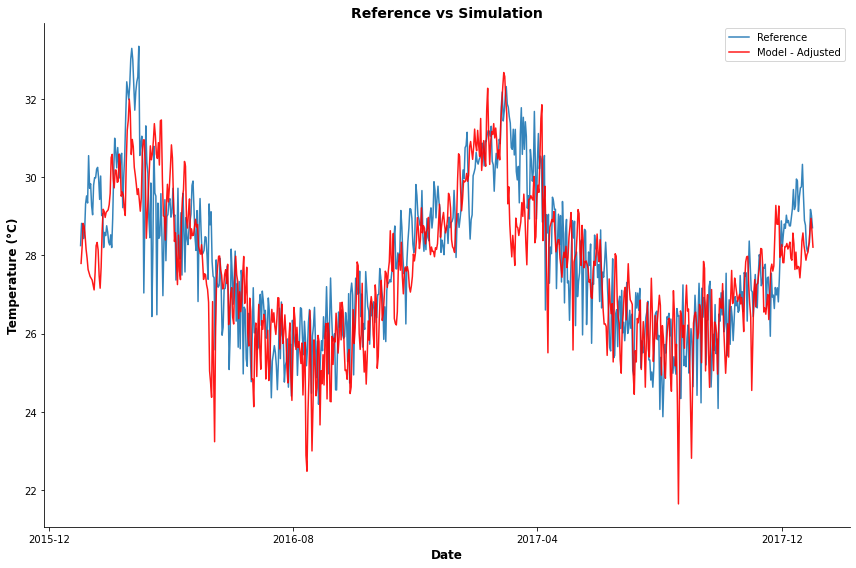

In [24]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

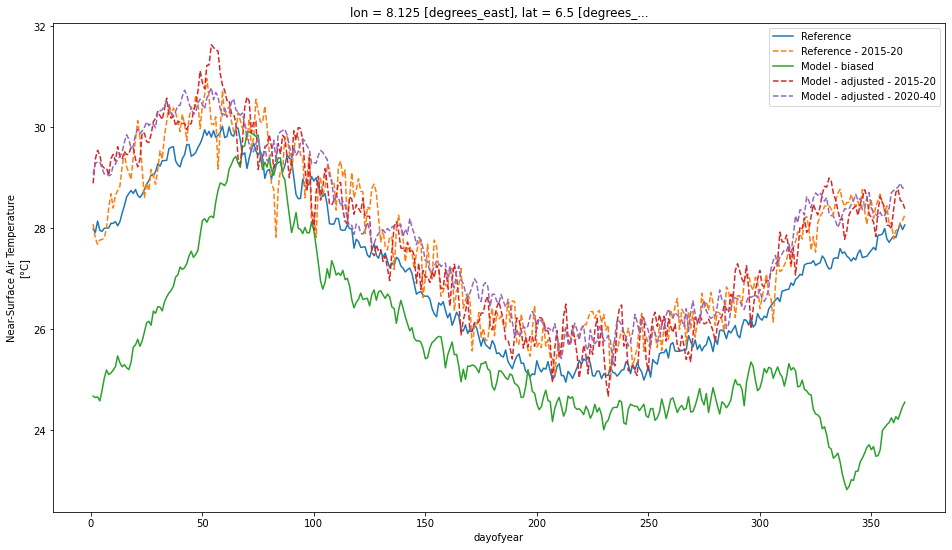

In [25]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

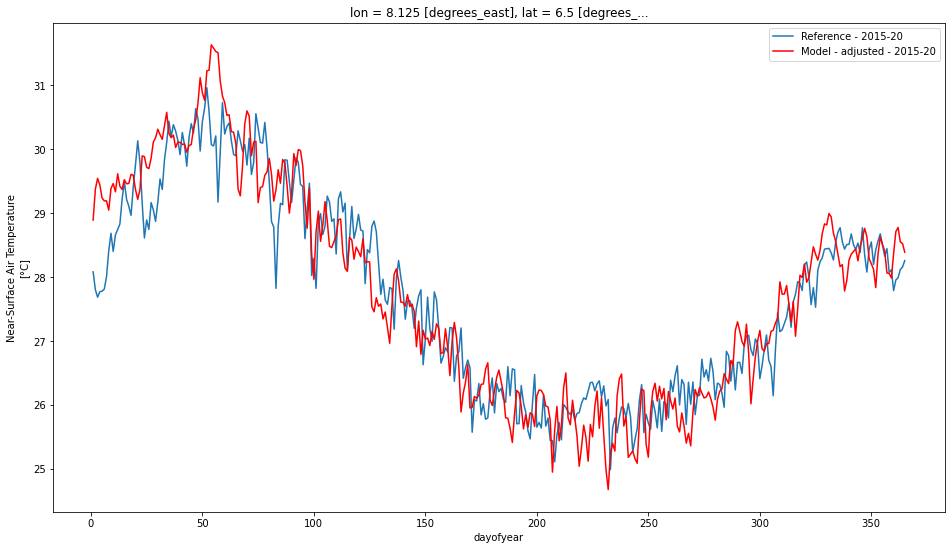

In [26]:
plt.figure(figsize=(16,9))

ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [27]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [28]:
scen.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.20444906])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [29]:
QM.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, lon: 30, lat: 30, dayofyear: 365)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
    height     float64 2.0
Data variables:
    af         (lon, lat, dayofyear, quantiles) float64 -24.14 -24.52 ... -14.97
    hist_q     (lon, lat, dayofyear, quantiles) float32 25.69 26.08 ... 16.03
Attributes:
    group:               time.dayofyear
    group_compute_dims:  ['time', 'window']
    group_window:        31
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(add_dims=[], ...

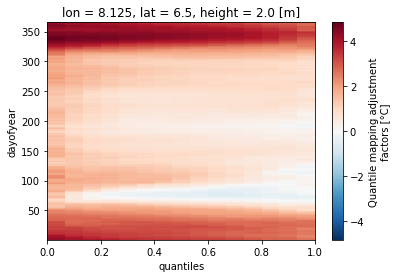

In [30]:
QM.ds.sel(lat=6.5,lon=8.125).af.plot()

In [31]:
# Second Model (Quantile Delta Mapping)

In [32]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_doy_31 = xclim.sdba.Grouper('time.dayofyear', window=31)

In [33]:
QDM = sdba.QuantileDeltaMapping.train(
    ref, hist, nquantiles=15, group=group_doy_31, kind="+"
)

In [34]:
scenQDM = QDM.adjust(ds_sim, extrapolation="constant", interp="linear")
scenQDM

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 2.6815956 , 13.41862033, 13.4466677 , ...,  9.07761975,
          9.26257382,  1.90237598],
        [ 4.15064028, 25.86482995, 25.95440003, ..., 16.80734554,
         17.71930802,  2.82269302],
        [ 4.10929417, 25.92084853, 26.0007843 , ..., 17.42215765,
         17.60192983,  2.87739193],
        ...,
        [ 4.74334178, 25.77390598, 25.05453776, ...,  8.56087278,
          9.30587799,  1.54595455],
        [ 4.81681386, 26.59636663, 25.74534645, ...,  9.55891157,
          9.0585088 ,  1.40757749],
        [ 2.98469043, 14.2110526 , 14.04911431, ...,  5.31204232,
          4.81911029,  0.86158368]],

       [[ 2.71322995, 13.44182718, 13.43542082, ...,  9.44611986,
          9.75064777,  2.27810294],
        [ 4.21536235, 25.83226709, 25.97217596, ..., 17.32137436,
         18.29219904,  3.1714527 ],
        [ 4.15414328, 25.88615733, 25.99003394, ..., 17.61356923,
         17.97803467,  3.11062101],
...
        [ 4.91373684, 26.37071961, 26.12746113, ..., 12.8251698 ,
         13.54012488,  3.17354287],
        [ 4.7355433 , 26.84425247, 26.68472185, ..., 13.58344933,
         13.96977053,  3.12168326],
        [ 3.27037056, 14.52777374, 14.63538372, ...,  8.48547785,
          8.87937398,  2.56355378]],

       [[ 2.86180573, 14.08547547, 13.93001415, ..., 10.73849524,
         11.06610853,  2.35186571],
        [ 4.49794502, 27.19949057, 27.21921711, ..., 19.82814285,
         20.78016942,  3.72383727],
        [ 4.56273024, 27.22626008, 27.5421594 , ..., 20.47699909,
         20.68327463,  3.80730646],
        ...,
        [ 4.74116408, 26.09030159, 25.57163343, ..., 11.6892269 ,
         11.42395947,  2.62108581],
        [ 4.61948971, 26.54555592, 26.01884035, ..., 12.5764124 ,
         12.61961716,  2.98441723],
        [ 3.18276305, 14.27649212, 14.34229518, ...,  8.12268297,
          8.44710224,  2.3307773 ]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:45:40] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [35]:
scenQDM_hist = QDM.adjust(ds_hist, extrapolation="constant", interp="linear")
scenQDM_hist

<xarray.DataArray 'scen' (time: 60225, lon: 30, lat: 30)>
array([[[ 1.00688108e+00,  1.19666860e+01,  1.20237354e+01, ...,
          7.16115833e+00,  7.13757217e+00, -1.94729795e-01],
        [ 2.52628618e+00,  2.44010401e+01,  2.46283955e+01, ...,
          1.46505059e+01,  1.53484623e+01,  6.89438674e-01],
        [ 2.53686449e+00,  2.43008297e+01,  2.46246512e+01, ...,
          1.54351019e+01,  1.51993108e+01,  5.87598426e-01],
        ...,
        [ 2.79133647e+00,  2.48384127e+01,  2.34242819e+01, ...,
          1.08583766e+01,  1.17188343e+01,  8.75109282e-01],
        [ 2.88977760e+00,  2.50225452e+01,  2.39043040e+01, ...,
          1.13106199e+01,  1.04757541e+01,  8.23149414e-01],
        [ 1.42648913e+00,  1.25967715e+01,  1.20936716e+01, ...,
          5.01877901e+00,  4.53116753e+00, -2.20196017e-02]],

       [[ 1.05995162e+00,  1.19489743e+01,  1.20253769e+01, ...,
          6.51994226e+00,  6.59682813e+00, -6.54809012e-01],
        [ 2.59890391e+00,  2.44196452e+01,  2.47061565e+01, ...,
          1.40007127e+01,  1.45971406e+01,  5.76374649e-02],
        [ 2.61930841e+00,  2.45778226e+01,  2.47631704e+01, ...,
          1.45831780e+01,  1.41669744e+01, -2.42376922e-01],
...
        [ 2.70825396e+00,  2.44910119e+01,  2.40663682e+01, ...,
          5.90648272e+00,  7.11757748e+00,  3.68283860e-01],
        [ 2.70627543e+00,  2.47482776e+01,  2.48959953e+01, ...,
          6.38106273e+00,  7.42258072e+00,  2.15568335e-01],
        [ 1.36630253e+00,  1.21530065e+01,  1.23481004e+01, ...,
          3.07135358e+00,  3.58350907e+00, -1.61618907e-01]],

       [[ 1.28998850e+00,  1.27315555e+01,  1.28352908e+01, ...,
          8.54500233e+00,  8.77656460e+00,  9.00955099e-01],
        [ 2.85959391e+00,  2.56310868e+01,  2.56940705e+01, ...,
          1.63768337e+01,  1.73372199e+01,  2.07767505e+00],
        [ 2.85147551e+00,  2.55354291e+01,  2.55323260e+01, ...,
          1.67437283e+01,  1.71168513e+01,  1.95097386e+00],
        ...,
        [ 2.72562837e+00,  2.43231781e+01,  2.38619150e+01, ...,
          6.31024616e+00,  7.56506133e+00,  7.20026808e-01],
        [ 2.78954937e+00,  2.47330293e+01,  2.48479489e+01, ...,
          7.29743832e+00,  7.52394517e+00,  5.32224723e-01],
        [ 1.43867068e+00,  1.25997957e+01,  1.24590584e+01, ...,
          3.39864229e+00,  3.44574883e+00, -1.54558714e-01]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:47:43] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [36]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.61173851])
Coordinates:
    lat      float64 6.5
    lon      float64 8.125
  * time     (time) object 2014-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:47:43] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [37]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [38]:
scenQDM.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.34867855])
Coordinates:
    lat      float64 6.5
    lon      float64 8.125
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:45:40] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

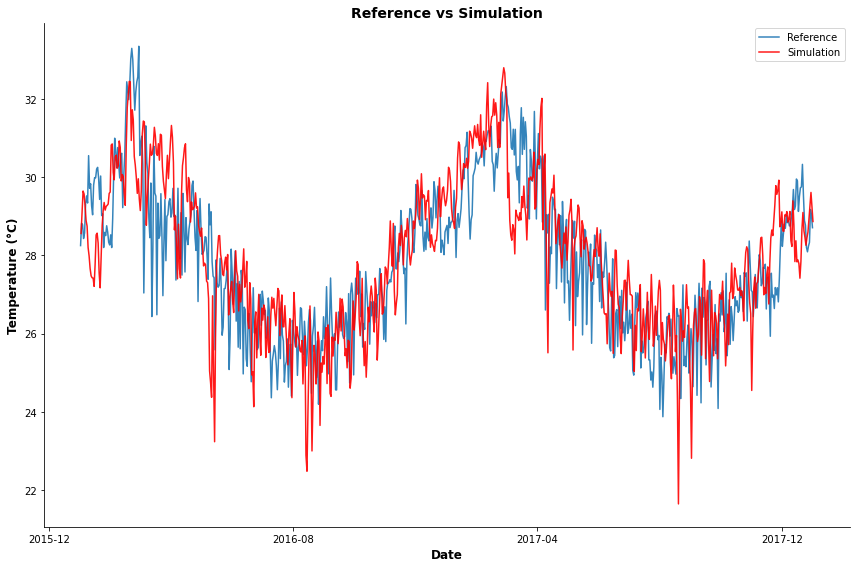

In [39]:
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM_sliced = scenQDM.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM_sliced.time, scenQDM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

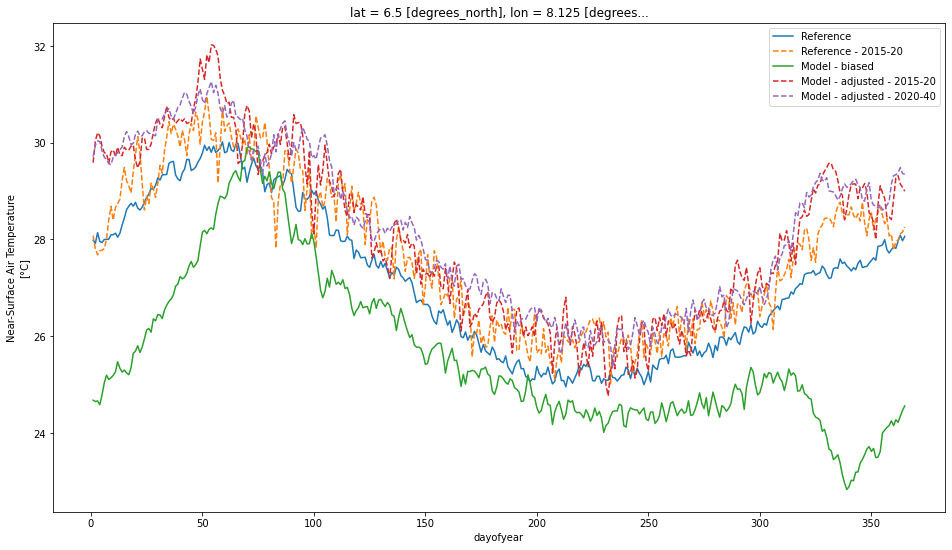

In [40]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [41]:
# Third Model
# Detrended Quantile Mapping

DQM = sdba.adjustment.DetrendedQuantileMapping.train(ref, hist)

In [42]:
scenDQM = DQM.adjust(ds_sim)

In [43]:
# adjust Historical GCM DataArray with Detrended Quantile Mapping
scenDQM_hist = DQM.adjust(ds_hist)
scenDQM_hist

<xarray.DataArray 'scen' (time: 60225, lon: 30, lat: 30)>
array([[[ 0.9826696 , 12.30337853, 12.32282893, ...,  7.52885216,
          7.57203862,  0.35035314],
        [ 2.72397634, 25.01752843, 25.1968664 , ..., 14.99546268,
         15.65343991,  1.22051676],
        [ 2.58735983, 24.85844141, 25.14545409, ..., 15.57496223,
         15.46851125,  1.0863248 ],
        ...,
        [ 2.25192033, 23.08306902, 21.57787192, ..., 10.74140184,
         11.47033493,  0.67294124],
        [ 2.32443841, 23.28366659, 21.84622986, ..., 11.17000766,
         10.46136163,  0.50378684],
        [ 1.04233217, 11.53107426, 10.81417502, ...,  5.03873105,
          4.25774841,  0.76389018]],

       [[ 1.0912374 , 12.26571984, 12.30418269, ...,  6.85761803,
          6.97017094, -0.19795619],
        [ 2.63571951, 25.03165807, 25.24133052, ..., 14.26777103,
         14.87069455,  0.47524698],
        [ 2.66929952, 25.05947332, 25.17360506, ..., 14.69770393,
         14.47870412,  0.08217441],
...
        [ 2.9185836 , 22.98978111, 22.68235798, ...,  5.54796292,
          6.87346768, -0.83317891],
        [ 2.85797037, 23.41121636, 23.078379  , ...,  6.13727276,
          7.02464333, -0.49985065],
        [ 1.59861393, 11.75538805, 11.73690451, ...,  1.93278862,
          2.84828837, -0.46670064]],

       [[ 1.69076815, 13.0537032 , 13.11197889, ...,  8.68854713,
          8.95043485,  1.19120169],
        [ 3.19243213, 25.99272792, 26.0579903 , ..., 16.51808115,
         17.46023243,  2.20282793],
        [ 3.30332905, 25.85890294, 25.91732524, ..., 16.88055922,
         17.11961062,  1.95541979],
        ...,
        [ 2.95456942, 22.7056937 , 22.31108725, ...,  6.24992825,
          7.502496  , -0.72474996],
        [ 2.83862222, 23.22243462, 22.98475107, ...,  7.16000835,
          7.27989235, -0.81973591],
        [ 1.53650802, 12.07147593, 11.70635642, ...,  2.84563042,
          2.58785136, -1.17333516]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:48:06] : Bias-adjusted with DetrendedQua...
    bias_adjustment:  DetrendedQuantileMapping(group=Grouper(add_dims=[], nam...

In [44]:
scenDQM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([27.48827194])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2014-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:48:06] : Bias-adjusted with DetrendedQua...
    bias_adjustment:  DetrendedQuantileMapping(group=Grouper(add_dims=[], nam...

In [45]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [46]:
scenDQM.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.66686906])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:47:56] : Bias-adjusted with DetrendedQua...
    bias_adjustment:  DetrendedQuantileMapping(group=Grouper(add_dims=[], nam...

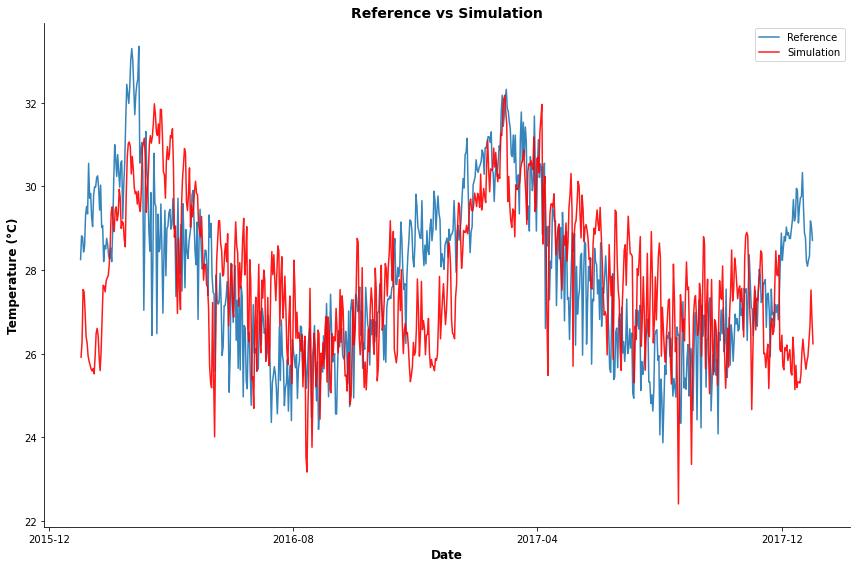

In [47]:
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenDQM_sliced = scenDQM.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenDQM_sliced.time, scenDQM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

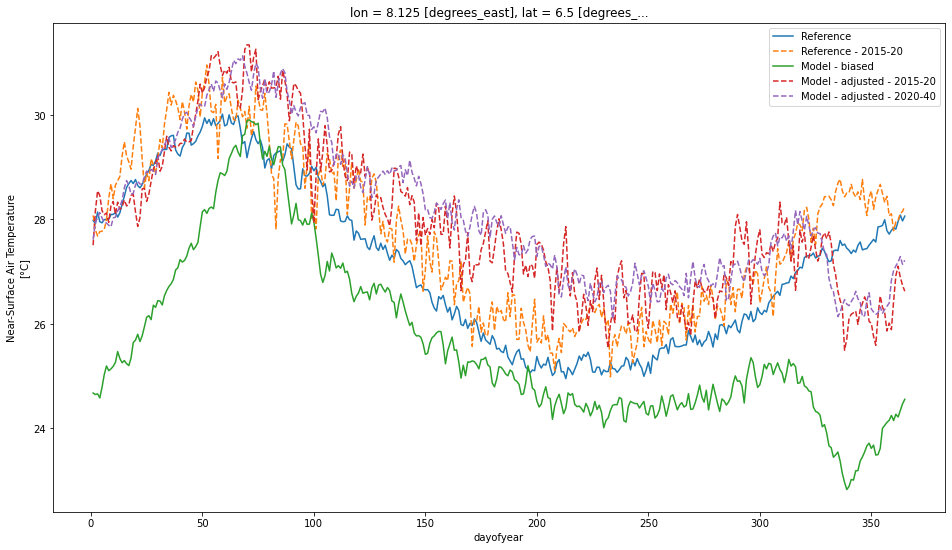

In [48]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenDQM.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenDQM.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

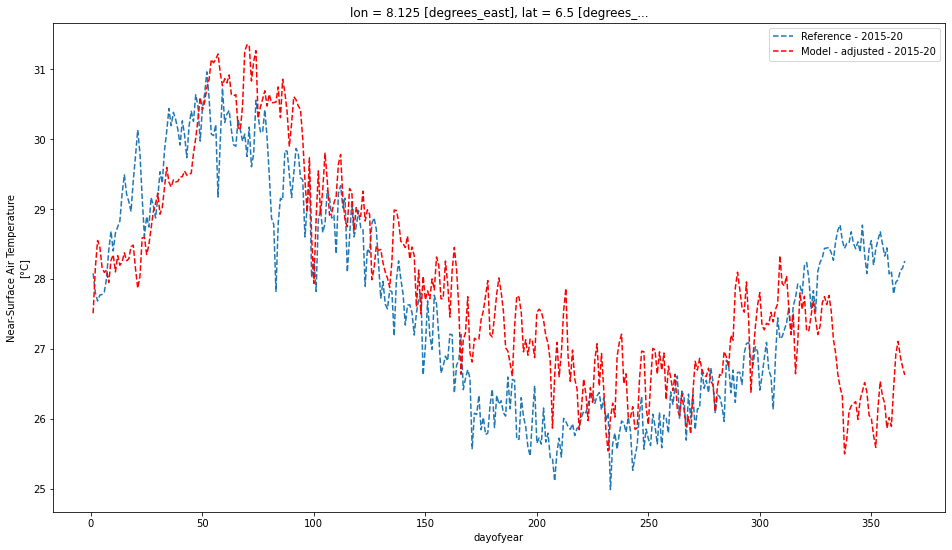

In [49]:
plt.figure(figsize=(16,9))
ds_ref_noleap.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Reference - 2015-20", linestyle="--")
scenDQM.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2015-20", linestyle="--",c='r')
plt.legend()

In [50]:
print((f'lenght of Model Adjusted data is : {len(scen.time.values)}'))
scen.time[59].data

lenght of Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [51]:
# Calendar conversion
# Convert Adjusted Simulation back to Standard Calendar

# Convert the Model Adjusted Simulation data to `Standard` calendar
scen_with_missing = xclim.core.calendar.convert_calendar(
    scen, 'standard', missing=np.NaN)
scen_out = scen_with_missing.interpolate_na(
    'time', method='linear')

scen_hist_with_missing = xclim.core.calendar.convert_calendar(
    scen_hist, 'standard', missing=np.NaN)
scen_hist_out = scen_hist_with_missing.interpolate_na(
    'time', method='linear')

scenQDM_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM, 'standard', missing=np.NaN)
scenQDM_out = scenQDM_with_missing.interpolate_na(
    'time', method='linear')

scenQDM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_hist, 'standard', missing=np.NaN)
scenQDM_hist_out = scenQDM_hist_with_missing.interpolate_na(
    'time', method='linear')

scenDQM_with_missing = xclim.core.calendar.convert_calendar(
    scenDQM, 'standard', missing=np.NaN)
scenDQM_out = scenDQM_with_missing.interpolate_na(
    'time', method='linear')

scenDQM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenDQM_hist, 'standard', missing=np.NaN)
scenDQM_hist_out = scenDQM_hist_with_missing.interpolate_na(
    'time', method='linear')

In [54]:
tas_nl = convert_calendar(tas, 'noleap')  # For the example
with_missing = convert_calendar(tas_nl, 'standard', missing=np.NaN)
out = with_missing.interpolate_na('time', method='linear')

NameError: name 'convert_calendar' is not defined

In [59]:
print((f'lenght of Model Adjusted data is : {len(scen_out.time.values)}'))
scen_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [60]:
scen_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [61]:
print((f'lenght of Model Adjusted data is : {len(scenDQM_out.time.values)}'))
scenDQM_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [64]:
# Convert CFTime index to datetime index
scen_out_copy = scen_out.copy()
scen_out_copy.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [67]:
scen_out_copy = scen_out_copy.to_dataset()
scen_out_copy

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.616 12.91 12.99 ... 7.657 8.08 0.9536

In [69]:
# Convert CFTime index to datetime index
scen_out_copy = scen_out.copy()
scen_out_copy.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [70]:
datetimeindex = scen_out_copy.indexes['time'].to_datetimeindex()

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


In [71]:
scen_out_copy['time'] = datetimeindex
scen_out_copy.time[59].data

array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [72]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen.time.values)}'))
scen.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [73]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen_with_missing = xclim.core.calendar.convert_calendar(
    scen, 'standard', missing=np.NaN)
scen_out = scen_with_missing.interpolate_na(
    'time', method='linear')
scen_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [74]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_out.time.values)}'))
scen_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [75]:
# convert CFTime index to Datetime index
datetimeindex = scen_out.indexes['time'].to_datetimeindex()
scen_out['time'] = datetimeindex
scen_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [76]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scen_hist.time.values)}'))
scen_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [77]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scen_hist_with_missing = xclim.core.calendar.convert_calendar(
    scen_hist, 'standard', missing=np.NaN)
scen_hist_out = scen_hist_with_missing.interpolate_na(
    'time', method='linear')

In [78]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_hist_out.time.values)}'))
scen_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [79]:
# convert CFTime index to Datetime index
datetimeindex = scen_hist_out.indexes['time'].to_datetimeindex()
scen_hist_out['time'] = datetimeindex
scen_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [80]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM.time.values)}'))
scenQDM.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [81]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenQDM_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM, 'standard', missing=np.NaN)
scenQDM_out = scenQDM_with_missing.interpolate_na(
    'time', method='linear')

In [82]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_out.time.values)}'))
scenQDM_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [83]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_out.indexes['time'].to_datetimeindex()
scenQDM_out['time'] = datetimeindex
scenQDM_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [84]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scenQDM_hist.time.values)}'))
scenQDM_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [85]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_hist, 'standard', missing=np.NaN)
scenQDM_hist_out = scenQDM_hist_with_missing.interpolate_na(
    'time', method='linear')

In [86]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_hist_out.time.values)}'))
scenQDM_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [87]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_hist_out.indexes['time'].to_datetimeindex()
scenQDM_hist_out['time'] = datetimeindex
scenQDM_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [88]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenDQM.time.values)}'))
scenDQM.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [89]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenDQM_with_missing = xclim.core.calendar.convert_calendar(
    scenDQM, 'standard', missing=np.NaN)
scenDQM_out = scenDQM_with_missing.interpolate_na(
    'time', method='linear')

In [90]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenDQM_out.time.values)}'))
scenDQM_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [91]:
# convert CFTime index to Datetime index
datetimeindex = scenDQM_out.indexes['time'].to_datetimeindex()
scenDQM_out['time'] = datetimeindex
scenDQM_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [92]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenDQM_hist.time.values)}'))
scenDQM_hist.time[59].data

lenght of Projection Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [93]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenDQM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenDQM_hist, 'standard', missing=np.NaN)
scenDQM_hist_out = scenDQM_hist_with_missing.interpolate_na(
    'time', method='linear')

In [94]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenDQM_hist_out.time.values)}'))
scenDQM_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [95]:
# convert CFTime index to Datetime index
datetimeindex = scenDQM_hist_out.indexes['time'].to_datetimeindex()
scenDQM_hist_out['time'] = datetimeindex
scenDQM_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [98]:
scen_hist_out.assign_attrs(long_name='Near-Surface Air Temperature')

<xarray.DataArray 'scen' (time: 60265, lon: 30, lat: 30)>
array([[[ 1.55439592e+00,  1.21799399e+01,  1.21410499e+01, ...,
          7.16115833e+00,  7.13757217e+00, -1.94729795e-01],
        [ 3.04670259e+00,  2.44056648e+01,  2.46814203e+01, ...,
          1.46505059e+01,  1.53484623e+01,  6.89438674e-01],
        [ 2.92812200e+00,  2.43028676e+01,  2.46709081e+01, ...,
          1.54351019e+01,  1.51993108e+01,  5.87598426e-01],
        ...,
        [ 3.17762591e+00,  2.49142750e+01,  2.36131085e+01, ...,
          1.09519702e+01,  1.17459592e+01,  1.45943844e+00],
        [ 3.15738155e+00,  2.51930715e+01,  2.40024284e+01, ...,
          1.13076629e+01,  1.04828925e+01,  1.29775300e+00],
        [ 1.61404477e+00,  1.28147492e+01,  1.23983391e+01, ...,
          5.34039947e+00,  4.89217443e+00,  6.03386772e-01]],

       [[ 1.46083768e+00,  1.21670774e+01,  1.21292990e+01, ...,
          6.51994226e+00,  6.59682813e+00, -6.54809012e-01],
        [ 2.98945596e+00,  2.44407876e+01,  2.47616657e+01, ...,
          1.40007127e+01,  1.45971406e+01,  5.76374649e-02],
        [ 3.02895332e+00,  2.46322519e+01,  2.48407725e+01, ...,
          1.45831780e+01,  1.41669744e+01, -2.42376922e-01],
...
        [ 3.15381649e+00,  2.48199180e+01,  2.43804419e+01, ...,
          5.90648272e+00,  7.12054968e+00,  7.42413406e-01],
        [ 3.13626340e+00,  2.50899768e+01,  2.50472890e+01, ...,
          6.38106273e+00,  7.44005630e+00,  9.80439673e-01],
        [ 1.58122884e+00,  1.26756654e+01,  1.26657308e+01, ...,
          3.07135358e+00,  3.98326562e+00,  5.34953975e-01]],

       [[ 1.61197998e+00,  1.28579812e+01,  1.29075079e+01, ...,
          8.71181795e+00,  8.86805163e+00,  1.12021300e+00],
        [ 3.21174942e+00,  2.55833984e+01,  2.56471044e+01, ...,
          1.64773353e+01,  1.74542556e+01,  2.19064132e+00],
        [ 3.20616707e+00,  2.55262138e+01,  2.55434321e+01, ...,
          1.68015506e+01,  1.71970933e+01,  2.14958369e+00],
        ...,
        [ 3.14064741e+00,  2.45525488e+01,  2.40408961e+01, ...,
          6.26515888e+00,  7.58118477e+00,  8.45895296e-01],
        [ 3.13911477e+00,  2.50468412e+01,  2.49941085e+01, ...,
          7.27115916e+00,  7.57017364e+00,  6.53863223e-01],
        [ 1.60175157e+00,  1.28179343e+01,  1.26604132e+01, ...,
          3.94418793e+00,  3.65419958e+00, -5.68143137e-04]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:42:39] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [100]:
scen.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 1.61617693, 12.90789552, 12.98665473, ...,  8.59997299,
          8.84548   ,  1.10546935],
        [ 3.22125715, 25.74796532, 25.90857068, ..., 16.67909373,
         17.61687261,  2.18430951],
        [ 3.21807927, 25.71119973, 25.85651533, ..., 17.27216817,
         17.46437841,  2.17172157],
        ...,
        [ 3.20829066, 25.0222182 , 24.42182828, ...,  8.52821779,
          9.24941122,  1.11928435],
        [ 3.20153353, 25.57406359, 25.1271428 , ...,  9.32853481,
          8.98818107,  1.10257131],
        [ 1.63169301, 13.05351633, 12.86963911, ...,  4.93671349,
          4.43833784,  0.53995405]],

       [[ 1.61353889, 12.89882178, 12.97556036, ...,  8.87608558,
          9.12630275,  1.14645729],
        [ 3.21800327, 25.70799701, 25.89301193, ..., 17.17166289,
         18.17138669,  2.257262  ],
        [ 3.2152853 , 25.6687654 , 25.83261064, ..., 17.35616006,
         17.8066901 ,  2.20372752],
...
        [ 3.46319546, 25.57632233, 25.48975817, ..., 12.51551274,
         13.33651195,  1.84437817],
        [ 3.6164126 , 26.21734039, 26.3420536 , ..., 13.32145995,
         14.00513505,  1.95913515],
        [ 2.53805594, 13.39552681, 13.78495883, ...,  8.02298857,
          8.57369281,  1.05037075]],

       [[ 2.4859328 , 13.88860951, 13.68924495, ..., 10.35433649,
         10.67815605,  1.36135679],
        [ 4.21098479, 27.34905459, 27.63716788, ..., 20.0170387 ,
         20.79943362,  2.68327437],
        [ 4.18027624, 27.47161442, 27.92289512, ..., 20.56403369,
         20.87209386,  2.70436361],
        ...,
        [ 3.21485928, 25.30508248, 24.82730234, ..., 11.56115804,
         11.47804475,  1.45589771],
        [ 3.22224491, 25.74740251, 25.35634306, ..., 12.46004749,
         12.56738551,  1.70422534],
        [ 1.87197802, 13.18222991, 13.0556768 , ...,  7.65688519,
          8.07961665,  0.95355817]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [101]:
scen.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 1.61617693, 12.90789552, 12.98665473, ...,  8.59997299,
          8.84548   ,  1.10546935],
        [ 3.22125715, 25.74796532, 25.90857068, ..., 16.67909373,
         17.61687261,  2.18430951],
        [ 3.21807927, 25.71119973, 25.85651533, ..., 17.27216817,
         17.46437841,  2.17172157],
        ...,
        [ 3.20829066, 25.0222182 , 24.42182828, ...,  8.52821779,
          9.24941122,  1.11928435],
        [ 3.20153353, 25.57406359, 25.1271428 , ...,  9.32853481,
          8.98818107,  1.10257131],
        [ 1.63169301, 13.05351633, 12.86963911, ...,  4.93671349,
          4.43833784,  0.53995405]],

       [[ 1.61353889, 12.89882178, 12.97556036, ...,  8.87608558,
          9.12630275,  1.14645729],
        [ 3.21800327, 25.70799701, 25.89301193, ..., 17.17166289,
         18.17138669,  2.257262  ],
        [ 3.2152853 , 25.6687654 , 25.83261064, ..., 17.35616006,
         17.8066901 ,  2.20372752],
...
        [ 3.46319546, 25.57632233, 25.48975817, ..., 12.51551274,
         13.33651195,  1.84437817],
        [ 3.6164126 , 26.21734039, 26.3420536 , ..., 13.32145995,
         14.00513505,  1.95913515],
        [ 2.53805594, 13.39552681, 13.78495883, ...,  8.02298857,
          8.57369281,  1.05037075]],

       [[ 2.4859328 , 13.88860951, 13.68924495, ..., 10.35433649,
         10.67815605,  1.36135679],
        [ 4.21098479, 27.34905459, 27.63716788, ..., 20.0170387 ,
         20.79943362,  2.68327437],
        [ 4.18027624, 27.47161442, 27.92289512, ..., 20.56403369,
         20.87209386,  2.70436361],
        ...,
        [ 3.21485928, 25.30508248, 24.82730234, ..., 11.56115804,
         11.47804475,  1.45589771],
        [ 3.22224491, 25.74740251, 25.35634306, ..., 12.46004749,
         12.56738551,  1.70422534],
        [ 1.87197802, 13.18222991, 13.0556768 , ...,  7.65688519,
          8.07961665,  0.95355817]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [102]:
# Regrid / Interpolate back to ERA5 grid

# file path for ERA5 Temperature Data
# ERA5 average temperature dataset file path 
fn4 = '/mnt/project/input/era5/era5_tas_day1979_2020_transposed.nc'

In [103]:
# Load the ERA5 1979 to 2020 average temperature dataset
ds_era5 = xr.open_dataset(fn3)
ds_era5

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [104]:
# lets create the output grid for coarse adjusted GFDL-ESM4 to ERA5

era5_grid = {'lat': ds_era5['lat'].values,
                     'lon': ds_era5['lon'].values,
                    }
era5_grid

{'lat': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
        23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 'lon': array([-18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
         -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,
         -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,   6.875,
          8.125,   9.375,  10.625,  11.875,  13.125,  14.375,  15.625,
         16.875,  18.125])}

In [105]:
# ERA5 grid with bounds

lat_boundary = np.hstack([ds_era5.coords['lat'].data - 0.125, ds_era5.coords['lat'][-1].data + 0.125])
lon_boundary = np.hstack([ds_era5.coords['lon'].data - 0.125, ds_era5.coords['lon'][-1].data + 0.125])

era5_grid_with_bounds = ds_era5
era5_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
era5_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
era5_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.375 2.375 3.375 4.375 ... 29.38 30.38 30.62
  * lon_b      (lon_b) float64 -18.25 -17.0 -15.75 -14.5 ... 16.75 18.0 18.25
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [108]:
# ERA5 grid with bounds

lat_boundary = np.hstack([ds_era5.coords['lat'].data - 0.125, ds_era5.coords['lat'][-1].data + 0.125])
lon_boundary = np.hstack([ds_era5.coords['lon'].data - 0.125, ds_era5.coords['lon'][-1].data + 0.125])

era5_grid_with_bounds = ds_era5
era5_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
era5_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
era5_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.375 2.375 3.375 4.375 ... 29.38 30.38 30.62
  * lon_b      (lon_b) float64 -18.25 -17.0 -15.75 -14.5 ... 16.75 18.0 18.25
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [111]:
# lets create the output grid for coarse adjusted GFDL-ESM4 to ERA5

era5_grid = {'lat': ds_era5['lat'].values,
                     'lon': ds_era5['lon'].values,
                    }
era5_grid

{'lat': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
        23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 'lon': array([-18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
         -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,
         -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,   6.875,
          8.125,   9.375,  10.625,  11.875,  13.125,  14.375,  15.625,
         16.875,  18.125])}

In [112]:
# ERA5 grid with bounds

lat_boundary = np.hstack([ds_era5.coords['lat'].data - 0.125, ds_era5.coords['lat'][-1].data + 0.125])
lon_boundary = np.hstack([ds_era5.coords['lon'].data - 0.125, ds_era5.coords['lon'][-1].data + 0.125])

era5_grid_with_bounds = ds_era5
era5_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
era5_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
era5_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.375 2.375 3.375 4.375 ... 29.38 30.38 30.62
  * lon_b      (lon_b) float64 -18.25 -17.0 -15.75 -14.5 ... 16.75 18.0 18.25
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [116]:
# ERA5 grid with bounds

lat_boundary = np.hstack([ds_era5.coords['lat'].data - 0.125, ds_era5.coords['lat'][-1].data + 0.125])
lon_boundary = np.hstack([ds_era5.coords['lon'].data - 0.125, ds_era5.coords['lon'][-1].data + 0.125])

era5_grid_with_bounds = ds_era5
era5_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
era5_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
era5_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.375 2.375 3.375 4.375 ... 29.38 30.38 30.62
  * lon_b      (lon_b) float64 -18.25 -17.0 -15.75 -14.5 ... 16.75 18.0 18.25
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [117]:
# transpose ERA5 minimum temperature to the right format
scen_out = scen_out.transpose('time','lat','lon')
scen_out

<xarray.DataArray 'scen' (time: 31411, lat: 30, lon: 30)>
array([[[ 1.61617693,  3.22125715,  3.21807927, ...,  3.20829066,
          3.20153353,  1.63169301],
        [12.90789552, 25.74796532, 25.71119973, ..., 25.0222182 ,
         25.57406359, 13.05351633],
        [12.98665473, 25.90857068, 25.85651533, ..., 24.42182828,
         25.1271428 , 12.86963911],
        ...,
        [ 8.59997299, 16.67909373, 17.27216817, ...,  8.52821779,
          9.32853481,  4.93671349],
        [ 8.84548   , 17.61687261, 17.46437841, ...,  9.24941122,
          8.98818107,  4.43833784],
        [ 1.10546935,  2.18430951,  2.17172157, ...,  1.11928435,
          1.10257131,  0.53995405]],

       [[ 1.61353889,  3.21800327,  3.2152853 , ...,  3.72615261,
          3.49810354,  1.66265243],
        [12.89882178, 25.70799701, 25.6687654 , ..., 26.17427953,
         26.88752666, 13.89254452],
        [12.97556036, 25.89301193, 25.83261064, ..., 25.6013862 ,
         26.34472883, 13.65496371],
...
        [ 9.8025956 , 19.16494344, 19.59701167, ..., 12.51551274,
         13.32145995,  8.02298857],
        [10.0323057 , 20.54717669, 20.80572443, ..., 13.33651195,
         14.00513505,  8.57369281],
        [ 1.22736141,  2.48303758,  2.60244841, ...,  1.84437817,
          1.95913515,  1.05037075]],

       [[ 2.4859328 ,  4.21098479,  4.18027624, ...,  3.21485928,
          3.22224491,  1.87197802],
        [13.88860951, 27.34905459, 27.47161442, ..., 25.30508248,
         25.74740251, 13.18222991],
        [13.68924495, 27.63716788, 27.92289512, ..., 24.82730234,
         25.35634306, 13.0556768 ],
        ...,
        [10.35433649, 20.0170387 , 20.56403369, ..., 11.56115804,
         12.46004749,  7.65688519],
        [10.67815605, 20.79943362, 20.87209386, ..., 11.47804475,
         12.56738551,  8.07961665],
        [ 1.36135679,  2.68327437,  2.70436361, ...,  1.45589771,
          1.70422534,  0.95355817]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [118]:
# ERA5 grid with bounds

lat_boundary = np.hstack([ds_era5.coords['lat'].data - 0.125, ds_era5.coords['lat'][-1].data + 0.125])
lon_boundary = np.hstack([ds_era5.coords['lon'].data - 0.125, ds_era5.coords['lon'][-1].data + 0.125])

era5_grid_with_bounds = ds_era5
era5_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
era5_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
era5_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.375 2.375 3.375 4.375 ... 29.38 30.38 30.62
  * lon_b      (lon_b) float64 -18.25 -17.0 -15.75 -14.5 ... 16.75 18.0 18.25
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [120]:
scen_out = scen_out.to_dataset()
scen_out

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lat, lon) float64 1.616 3.221 3.218 ... 1.456 1.704 0.9536

In [121]:
# GFDL grid with bounds
lat_boundary_scen_out = np.hstack([scen_out.coords['lat'].data - 0.5, scen_out.coords['lat'][-1].data + 0.5])
lon_boundary_scen_out = np.hstack([scen_out.coords['lon'].data - 0.625, scen_out.coords['lon'][-1].data + 0.625])

gfdl_grid_with_bounds = scen_out
gfdl_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary_scen_out, dims=['lat_b'])
gfdl_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary_scen_out, dims=['lon_b'])
gfdl_grid_with_bounds

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
  * lat_b    (lat_b) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lon_b    (lon_b) float64 -18.75 -17.5 -16.25 -15.0 ... 15.0 16.25 17.5 18.75
Data variables:
    scen     (time, lat, lon) float64 1.616 3.221 3.218 ... 1.456 1.704 0.9536

In [122]:
a = scen_hist.to_dataset()
a

<xarray.Dataset>
Dimensions:  (lon: 30, lat: 30, time: 60225)
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.554 12.18 12.14 ... 3.654 -0.0005681

In [123]:
# lets apply the Conservative Regridding
# first Make a new regridder with conservative option and apply it to our data.

regridder_conserve_era5 = xe.Regridder(gfdl_grid_with_bounds, era5_grid_with_bounds, method='conservative')
regridder_conserve_era5  # print basic regridder information.

Create weight file: conservative_30x30_30x30.nc


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_30x30_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (30, 30) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [124]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5 = regridder_conserve_era5(scen_out)
ds_gfdl_conserve_era5

using dimensions ('lat', 'lon') from data variable scen as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lat_b    (lat_b) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lon_b    (lon_b) float64 -18.75 -17.5 -16.25 -15.0 ... 15.0 16.25 17.5 18.75
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 8.177 11.66 11.66 ... 1.555 1.404 0.9536
Attributes:
    regrid_method:  conservative

In [126]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')

In [127]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')

In [128]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')

In [129]:
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(units='°C')

In [130]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(units='°C')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    standard_name='air_temperature')

In [132]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(units='°C')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lat_b    (lat_b) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lon_b    (lon_b) float64 -18.75 -17.5 -16.25 -15.0 ... 15.0 16.25 17.5 18.75
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 8.177 11.66 11.66 ... 1.555 1.404 0.9536
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [134]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5 = ds_gfdl_conserve_era5.rename({'scen':'tas'})
ds_gfdl_conserve_era5

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lat_b    (lat_b) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lon_b    (lon_b) float64 -18.75 -17.5 -16.25 -15.0 ... 15.0 16.25 17.5 18.75
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.177 11.66 11.66 ... 1.555 1.404 0.9536
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [135]:
# Historical data output

scen_hist_out = scen_hist_out.to_dataset()
scen_hist_out

<xarray.Dataset>
Dimensions:  (time: 60265, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.554 12.18 12.14 ... 3.654 -0.0005681

In [136]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5_hist = regridder_conserve_era5(scen_hist_out)
ds_gfdl_conserve_era5_hist

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 7.974 16.8 16.92 ... 2.192 -0.0005681
Attributes:
    regrid_method:  conservative

In [137]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.rename({'scen':'tas'})
ds_gfdl_conserve_era5_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.974 16.8 16.92 ... 2.192 -0.0005681
Attributes:
    regrid_method:  conservative

In [138]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(units='°C')
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5_hist
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5_hist = ds_gfdl_conserve_era5_hist.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.974 16.8 16.92 ... 2.192 -0.0005681
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [139]:
# QDM data output

scenQDM_out = scenQDM_out.to_dataset()
scenQDM_out

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 2.682 13.42 13.45 ... 8.123 8.447 2.331

In [140]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5_QDM = regridder_conserve_era5(scenQDM_out)
ds_gfdl_conserve_era5_QDM

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 9.173 18.11 18.15 ... 8.252 6.001 2.331
Attributes:
    regrid_method:  conservative

In [141]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.rename({'scen':'tas'})
ds_gfdl_conserve_era5_QDM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 9.173 18.11 18.15 ... 8.252 6.001 2.331
Attributes:
    regrid_method:  conservative

In [142]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(units='°C')
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5_QDM
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5_QDM = ds_gfdl_conserve_era5_QDM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5_QDM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 9.173 18.11 18.15 ... 8.252 6.001 2.331
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [143]:
# Historical QDM data output

scenQDM_hist_out = scenQDM_hist_out.to_dataset()
scenQDM_hist_out

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.007 11.97 12.02 ... 3.399 3.446 -0.1546

In [144]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5_QDM_hist = regridder_conserve_era5(scenQDM_hist_out)
ds_gfdl_conserve_era5_QDM_hist

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 7.597 16.68 16.83 ... 3.417 2.006 -0.1546
Attributes:
    regrid_method:  conservative

In [145]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.rename({'scen':'tas'})
ds_gfdl_conserve_era5_QDM_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.597 16.68 16.83 ... 3.417 2.006 -0.1546
Attributes:
    regrid_method:  conservative

In [146]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(units='°C')
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5_QDM_hist
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5_QDM_hist = ds_gfdl_conserve_era5_QDM_hist.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5_QDM_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.597 16.68 16.83 ... 3.417 2.006 -0.1546
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [147]:
# DQM data output

scenDQM_out = scenDQM_out.to_dataset()
scenDQM_out

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 2.166 13.42 13.48 ... 8.563 8.691 3.047

In [148]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5_DQM = regridder_conserve_era5(scenDQM_out)
ds_gfdl_conserve_era5_DQM

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 8.929 18.26 18.32 ... 8.614 6.434 3.047
Attributes:
    regrid_method:  conservative

In [149]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.rename({'scen':'tas'})
ds_gfdl_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.929 18.26 18.32 ... 8.614 6.434 3.047
Attributes:
    regrid_method:  conservative

In [150]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(units='°C')
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5_DQM
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5_DQM = ds_gfdl_conserve_era5_DQM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.929 18.26 18.32 ... 8.614 6.434 3.047
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [151]:
# Historical DQM data output

scenDQM_hist_out = scenDQM_hist_out.to_dataset()
scenDQM_hist_out

<xarray.Dataset>
Dimensions:  (time: 60265, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 0.9827 12.3 12.32 ... 2.846 2.588 -1.173

In [152]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl_conserve_era5_DQM_hist = regridder_conserve_era5(scenDQM_hist_out)
ds_gfdl_conserve_era5_DQM_hist

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 7.809 17.1 17.21 ... 2.743 1.083 -1.173
Attributes:
    regrid_method:  conservative

In [153]:
# rename Minimum Temperature Dataset
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.rename({'scen':'tas'})
ds_gfdl_conserve_era5_DQM_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.809 17.1 17.21 ... 2.743 1.083 -1.173
Attributes:
    regrid_method:  conservative

In [154]:
# re-assign Dimension name attribute
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(units='°C')
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(
    standard_name='air_temperature')
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(
    interp_method='conservative')
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(
    original_name='tas')
ds_gfdl_conserve_era5_DQM_hist
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl_conserve_era5_DQM_hist = ds_gfdl_conserve_era5_DQM_hist.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl_conserve_era5_DQM_hist

<xarray.Dataset>
Dimensions:  (time: 60265, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 7.809 17.1 17.21 ... 2.743 1.083 -1.173
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [156]:
# Save datasets

scen_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_qm_conser-nointerp_20150101-21001231.nc')
scen_hist_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_qm_conser-nointerp_18500101-20141231.nc')
scenQDM_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_qdm_conser-nointerp_20150101-21001231.nc')
scenQDM_hist_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_qdm_conser-nointerp_18500101-20141231.nc')
scenDQM_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_dqm_conser-nointerp_20150101-21001231.nc')
scenDQM_hist_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_dqm_conser-nointerp_18500101-20141231.nc')
ds_gfdl_conserve_era5.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_qm_conser-conservative_20150101-21001231.nc')
ds_gfdl_conserve_era5_hist.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_qm_conser-conservative_18500101-20141231.nc')
ds_gfdl_conserve_era5_QDM.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_qdm_conser-conservative_20150101-21001231.nc')
ds_gfdl_conserve_era5_QDM_hist.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_qdm_conser-conservative_18500101-20141231.nc')
ds_gfdl_conserve_era5_DQM.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp245_dqm_conser-conservative_20150101-21001231.nc')
ds_gfdl_conserve_era5_DQM_hist.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_historical_dqm_conser-conservative_18500101-20141231.nc')

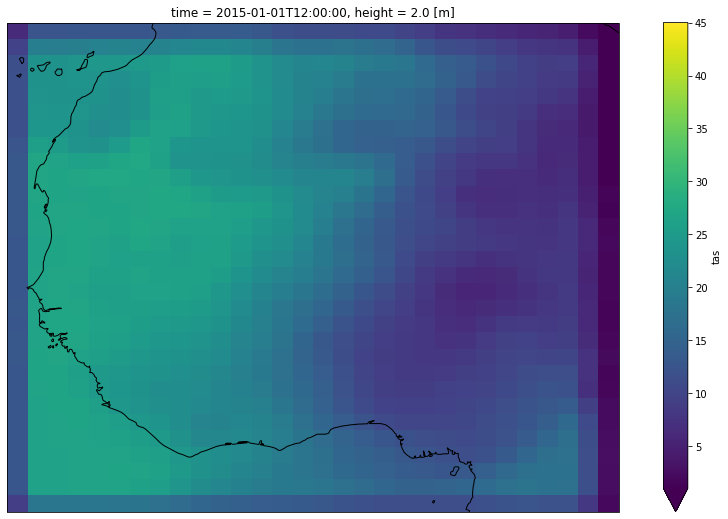

In [158]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_gfdl_conserve_era5_DQM.tas.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=45);
ax.coastlines()

In [159]:
# Second Emission scenario
fn4 = 'tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231.nc'

In [160]:
# load GCM Simulation ssp585 dataset
ds_sim585 = xr.open_dataset(fn4)
ds_sim585

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/5af0c4f2-9d6c-456a-ade9-e8a630a9ef6f
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [161]:
# `sim` is given in Kelvin, we must convert to Celsius to fit with `ref`

ds_sim585 = xclim.core.units.convert_units_to(ds_sim585.tas, 'degC')
ds_sim585

<xarray.DataArray 'tas' (time: 31390, lat: 30, lon: 30)>
array([[[26.890198 , 26.827759 , 26.798615 , ..., 23.402435 ,
         23.665802 , 24.338715 ],
        [26.997833 , 26.955017 , 26.888397 , ..., 21.921143 ,
         22.980286 , 23.925842 ],
        [27.08139  , 27.056824 , 26.994202 , ..., 21.792114 ,
         22.249817 , 23.324127 ],
        ...,
        [17.769073 , 17.107025 , 17.433289 , ...,  6.89682  ,
          7.0092163,  7.6812134],
        [17.66394  , 17.62088  , 17.606476 , ...,  7.0040283,
          6.8601074,  6.821228 ],
        [17.306366 , 17.204132 , 17.221252 , ...,  7.232239 ,
          7.445038 ,  8.996887 ]],

       [[26.853363 , 26.798004 , 26.768036 , ..., 24.465698 ,
         24.73883  , 24.972748 ],
        [26.963348 , 26.902618 , 26.834229 , ..., 23.571075 ,
         24.508667 , 25.076935 ],
        [27.0578   , 27.035187 , 26.954926 , ..., 23.515991 ,
         23.932495 , 24.690002 ],
...
        [22.354889 , 21.732605 , 21.697418 , ..., 12.661591 ,
         11.825134 , 11.046143 ],
        [22.464417 , 22.423553 , 22.10736  , ..., 12.7517395,
         12.309235 , 10.928619 ],
        [22.331268 , 22.053802 , 21.888855 , ..., 14.165985 ,
         13.294006 , 13.742004 ]],

       [[29.934052 , 29.786957 , 29.706818 , ..., 28.978577 ,
         28.738068 , 30.057343 ],
        [30.001648 , 29.866577 , 29.9393   , ..., 28.008026 ,
         28.720459 , 29.778717 ],
        [29.852356 , 29.82605  , 29.855865 , ..., 27.91272  ,
         27.967896 , 29.085693 ],
        ...,
        [22.382599 , 21.715332 , 21.95758  , ..., 12.569519 ,
         11.939331 , 11.74707  ],
        [22.120087 , 22.141815 , 22.124146 , ..., 12.279022 ,
         11.881439 , 11.477264 ],
        [21.487274 , 21.527252 , 21.687408 , ..., 12.904968 ,
         12.50882  , 13.70047  ]]], dtype=float32)
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [162]:
scen585 = QM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scen585

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 1.61588554, 12.90789552, 12.98790275, ...,  8.60643236,
          8.85640415,  1.1059726 ],
        [ 3.22127203, 25.74668774, 25.9091358 , ..., 16.74260676,
         17.67083834,  2.18741659],
        [ 3.21884008, 25.70908442, 25.85852714, ..., 17.30999142,
         17.48051274,  2.16657774],
        ...,
        [ 3.21133595, 25.01776616, 24.47821518, ...,  8.52599928,
          9.25170659,  1.11940485],
        [ 3.20488334, 25.43773389, 25.11565403, ...,  9.31516067,
          9.05151141,  1.1045769 ],
        [ 1.63940715, 13.03287789, 12.85649571, ...,  4.93331712,
          4.43428228,  0.53971868]],

       [[ 1.61347758, 12.90048899, 12.97526491, ...,  8.89751991,
          9.12320028,  1.14388973],
        [ 3.21748523, 25.70791234, 25.89053312, ..., 17.1134955 ,
         18.0902316 ,  2.2532476 ],
        [ 3.21555027, 25.66879528, 25.83298847, ..., 17.33206954,
         17.70769214,  2.19871889],
...
        [ 7.53665127, 30.3357137 , 30.36079089, ..., 14.3086007 ,
         15.17976068,  2.02275951],
        [ 6.35396143, 30.19625275, 30.56001014, ..., 14.23071131,
         14.44871296,  1.8787167 ],
        [ 5.11596731, 17.39644234, 17.74327182, ...,  6.61915473,
          6.31394901,  0.86408938]],

       [[ 4.18335102, 15.69790516, 15.61038752, ..., 11.62682794,
         11.76616875,  2.60687071],
        [ 5.62025603, 28.82210757, 29.10274405, ..., 21.30549085,
         21.805293  ,  3.92295942],
        [ 5.45221838, 29.01989323, 29.1843087 , ..., 21.69083423,
         21.86425085,  4.03755453],
        ...,
        [ 8.01892299, 30.47745191, 30.04281003, ..., 14.30324814,
         14.62273434,  1.83079178],
        [ 7.48030409, 30.98151773, 30.67412018, ..., 14.6056554 ,
         13.97288923,  1.73780448],
        [ 6.70120165, 18.46582505, 18.20081151, ...,  6.88313473,
          6.59715349,  0.8679096 ]]])
Coordinates:
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 08:58:29] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

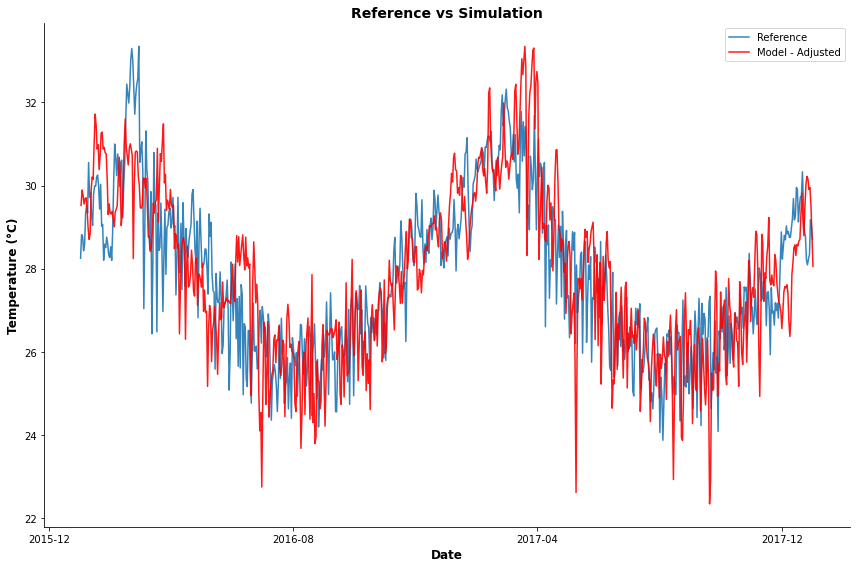

In [163]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

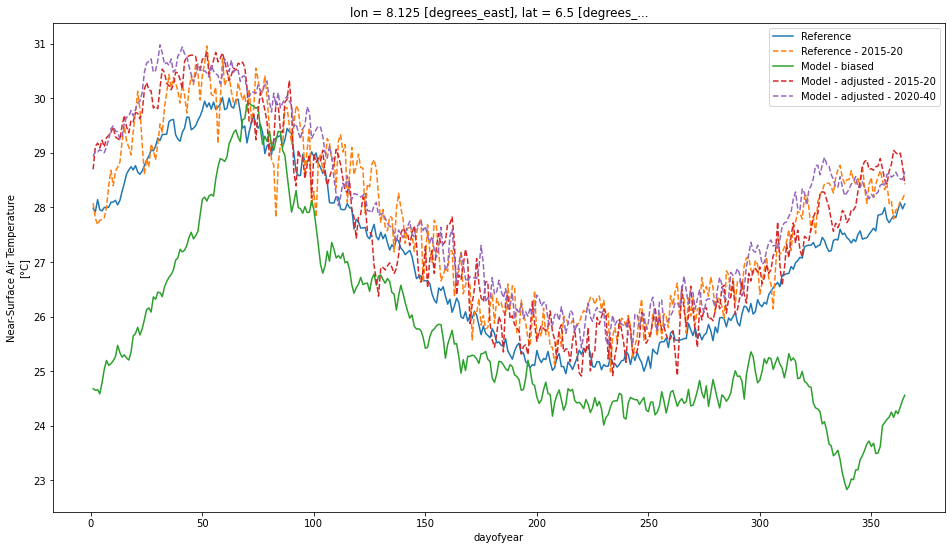

In [164]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

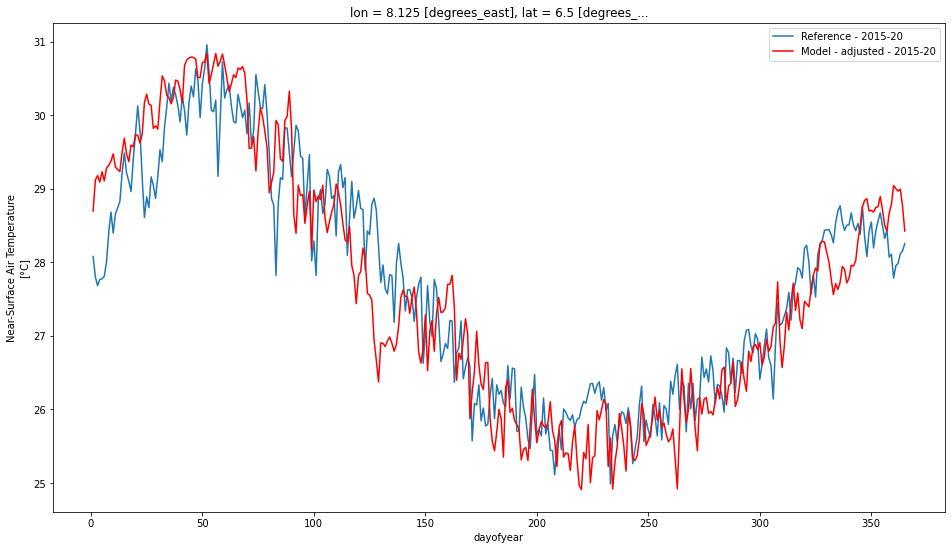

In [165]:
plt.figure(figsize=(16,9))

ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [166]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [167]:
scen585.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.81092674])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 08:58:29] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [168]:
# Second Model (Quantile Delta Mapping)

scenQDM585 = QDM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scenQDM585

<xarray.DataArray 'scen' (time: 31390, lon: 30, lat: 30)>
array([[[ 2.47839413, 13.41862033, 13.42489767, ...,  9.24590565,
          9.54323675,  2.40958362],
        [ 4.09027552, 25.8607079 , 25.95393587, ..., 16.87676319,
         17.82062149,  3.27275878],
        [ 4.06295546, 25.91776122, 25.99202175, ..., 17.56536589,
         17.65441945,  3.24094446],
        ...,
        [ 5.11099357, 25.89991947, 25.16546798, ...,  8.55843137,
          9.36564373,  1.91958744],
        [ 5.00993168, 26.6018314 , 25.82407714, ...,  9.4614976 ,
          9.27069841,  1.7898167 ],
        [ 3.34523853, 14.634759  , 14.40210787, ...,  6.00911809,
          5.06317704,  0.87547675]],

       [[ 2.52041291, 13.33244316, 13.38501277, ...,  9.99923432,
         10.04856366,  2.5748506 ],
        [ 4.02722939, 25.81886223, 25.9341809 , ..., 17.33912209,
         18.30726002,  3.52521312],
        [ 3.95180382, 25.85321051, 25.96195783, ..., 17.67887643,
         17.85602824,  3.63692688],
...
        [ 7.53665127, 30.3357137 , 30.36079089, ..., 14.01921852,
         14.82804171,  3.28954806],
        [ 6.52965551, 30.19625275, 30.56001014, ..., 14.14039742,
         14.25956201,  3.18411266],
        [ 5.44985613, 17.39644234, 17.74327182, ...,  7.18614875,
          6.99129731,  2.60347468]],

       [[ 4.41445656, 15.79976116, 15.71183616, ..., 11.7653333 ,
         11.91738737,  3.10172403],
        [ 5.85933421, 28.72200623, 28.73430347, ..., 21.25852653,
         21.80842878,  4.21032424],
        [ 5.76492869, 28.82097747, 28.80357298, ..., 21.64274274,
         21.74539636,  4.2723349 ],
        ...,
        [ 8.01892299, 30.47745191, 30.04281003, ..., 14.01662506,
         14.39069573,  3.31250933],
        [ 7.48030409, 30.98151773, 30.67412018, ..., 14.17473778,
         13.8464592 ,  3.32037763],
        [ 6.70120165, 18.46582505, 18.20081151, ...,  7.76738172,
          7.42385829,  2.40170178]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 09:00:20] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [169]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.61173851])
Coordinates:
    lat      float64 6.5
    lon      float64 8.125
  * time     (time) object 2014-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:47:43] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [170]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [171]:
scenQDM585.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([26.96208545])
Coordinates:
    lat      float64 6.5
    lon      float64 8.125
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 09:00:20] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

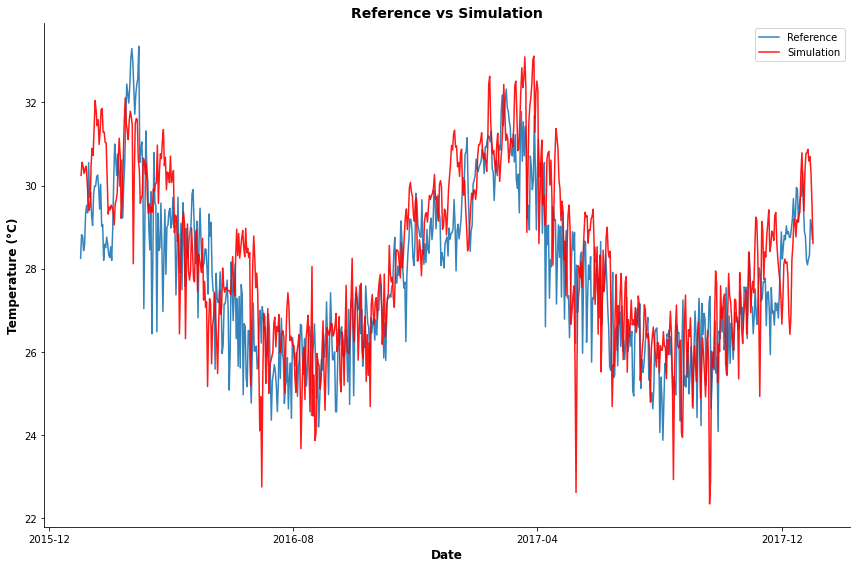

In [172]:
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM585_sliced = scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM585_sliced.time, scenQDM585_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

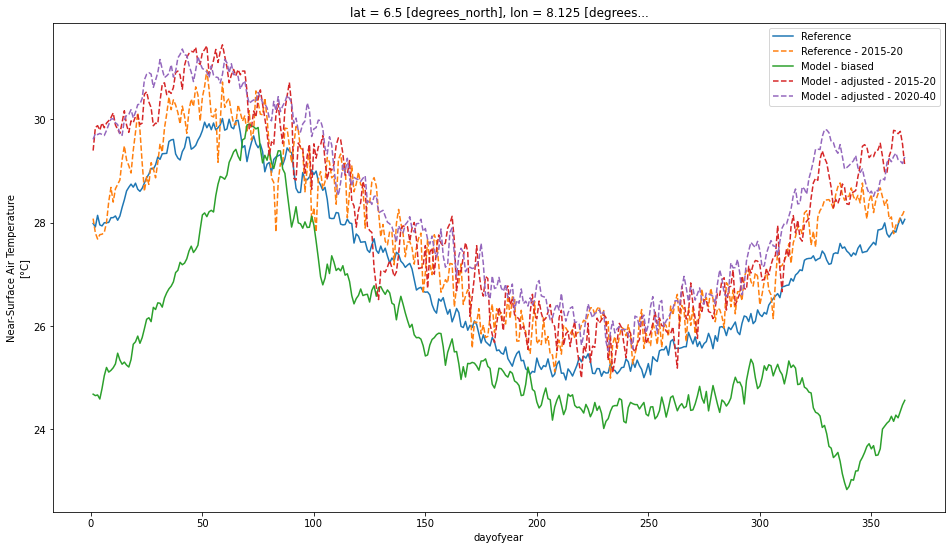

In [173]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [174]:
# Third Model

scenDQM585 = DQM.adjust(ds_sim585)

In [175]:
scenDQM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([27.48827194])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2014-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 01:48:06] : Bias-adjusted with DetrendedQua...
    bias_adjustment:  DetrendedQuantileMapping(group=Grouper(add_dims=[], nam...

In [176]:
ds_ref_noleap.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'tas' (time: 1)>
array([23.98107598])
Coordinates:
  * time     (time) object 2020-09-15 00:00:00
    lon      float64 8.125
    lat      float64 6.5
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          °C
    standard_name:  air_temperature
    interp_method:  conservative

In [177]:
scenDQM585.sel(lat=6.5,lon=8.125,time="2020-09-15")

<xarray.DataArray 'scen' (time: 1)>
array([27.61824181])
Coordinates:
    lon      float64 8.125
    lat      float64 6.5
  * time     (time) object 2020-09-15 12:00:00
    height   float64 2.0
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    air_temperature
    interp_method:    conserve_order2
    original_name:    tas
    history:          [2022-03-27 09:00:29] : Bias-adjusted with DetrendedQua...
    bias_adjustment:  DetrendedQuantileMapping(group=Grouper(add_dims=[], nam...

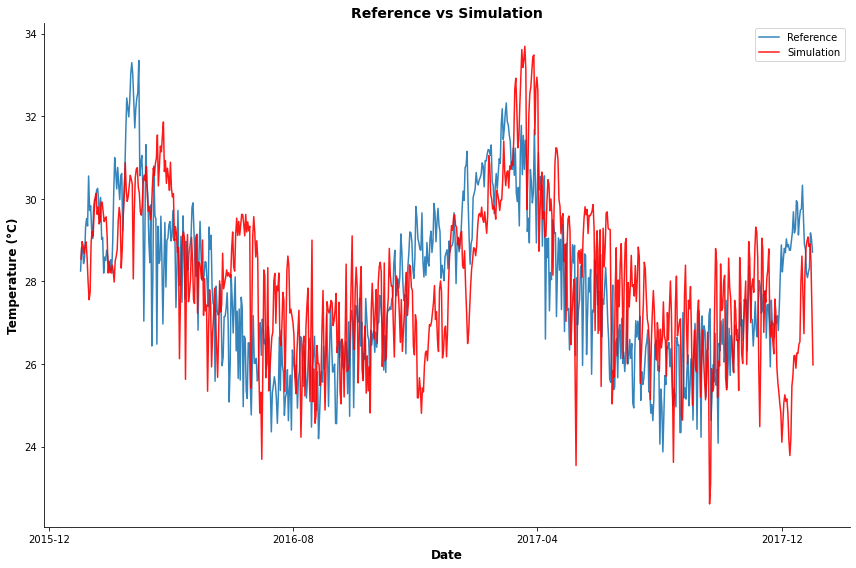

In [178]:
ref_sliced = ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenDQM585_sliced = scenDQM585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenDQM585_sliced.time, scenDQM585_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Temperature (°C)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

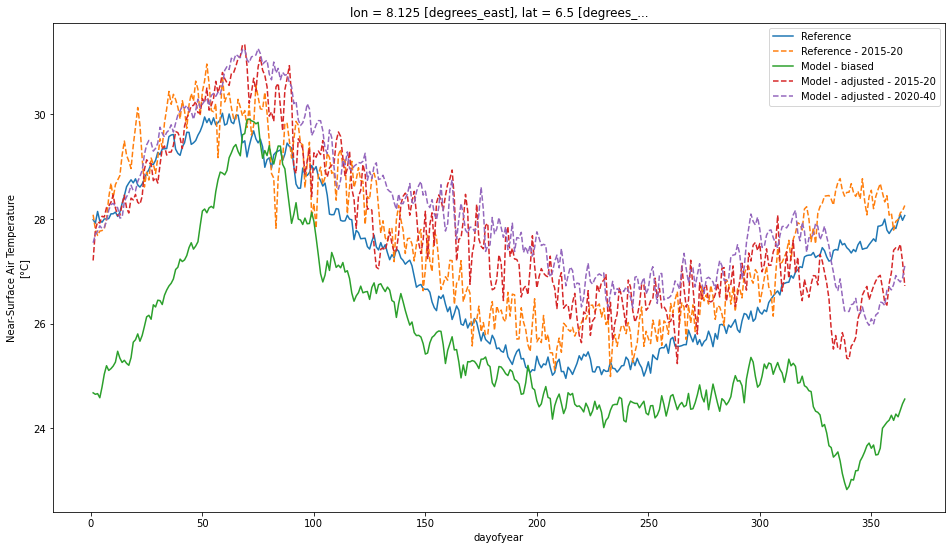

In [179]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref_noleap.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenDQM585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenDQM585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

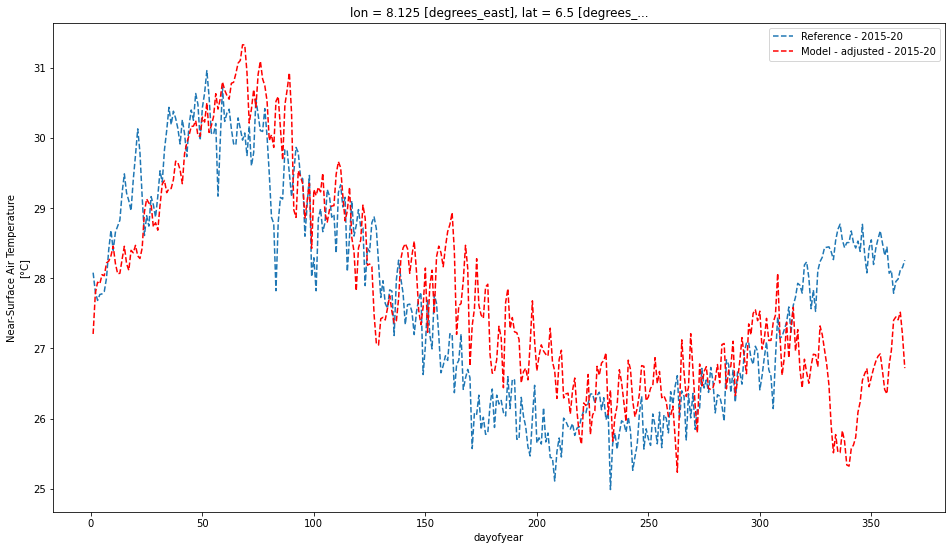

In [180]:
plt.figure(figsize=(16,9))
ds_ref_noleap.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Reference - 2015-20", linestyle="--")
scenDQM585.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2015-20", linestyle="--",c='r')
plt.legend()

In [181]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen585.time.values)}'))
scen585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [182]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen585_with_missing = xclim.core.calendar.convert_calendar(
    scen585, 'standard', missing=np.NaN)
scen585_out = scen585_with_missing.interpolate_na(
    'time', method='linear')
scen585_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [183]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen585_out.time.values)}'))
scen585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [184]:
# convert CFTime index to Datetime index
datetimeindex = scen585_out.indexes['time'].to_datetimeindex()
scen585_out['time'] = datetimeindex
scen585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [185]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM585.time.values)}'))
scenQDM585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [186]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenQDM585_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM585, 'standard', missing=np.NaN)
scenQDM585_out = scenQDM585_with_missing.interpolate_na(
    'time', method='linear')

In [187]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM585_out.time.values)}'))
scenQDM585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [188]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM585_out.indexes['time'].to_datetimeindex()
scenQDM585_out['time'] = datetimeindex
scenQDM585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [189]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenDQM585.time.values)}'))
scenDQM585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [190]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenDQM585_with_missing = xclim.core.calendar.convert_calendar(
    scenDQM585, 'standard', missing=np.NaN)
scenDQM585_out = scenDQM585_with_missing.interpolate_na(
    'time', method='linear')

In [191]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenDQM585_out.time.values)}'))
scenDQM585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [192]:
# convert CFTime index to Datetime index
datetimeindex = scenDQM585_out.indexes['time'].to_datetimeindex()
scenDQM585_out['time'] = datetimeindex
scenDQM585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

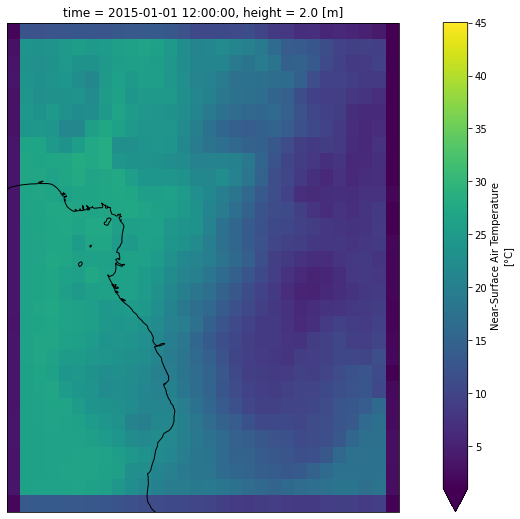

In [193]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenDQM585.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=45);
ax.coastlines()

In [194]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl585_conserve_era5 = regridder_conserve_era5(scen585_out)
ds_gfdl585_conserve_era5

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


<xarray.DataArray 'scen' (time: 31411, lat: 30, lon: 30)>
array([[[ 8.41927339, 17.7659302 , 17.89451256, ..., 11.85864891,
          7.90132434,  1.51131664],
        [12.22520981, 25.79561908, 26.00706257, ..., 17.21298333,
         11.43156246,  2.17960775],
        [12.22779919, 25.80375267, 26.03276232, ..., 17.3541754 ,
         11.32843495,  2.16537712],
        ...,
        [11.99525341, 24.99148194, 25.05721769, ...,  8.96336962,
          5.95166478,  1.11388167],
        [ 9.89199757, 20.69346298, 20.78765478, ...,  7.53646852,
          4.75266098,  0.89421903],
        [ 6.19679052, 12.9623251 , 12.99687887, ...,  4.7337034 ,
          2.87645852,  0.53971868]],

       [[ 8.40985138, 17.74847987, 17.92254685, ..., 12.18085727,
          8.1150838 ,  1.55969638],
        [12.20731244, 25.76353213, 26.02536816, ..., 17.49598904,
         11.6612432 ,  2.23281434],
        [12.20990905, 25.76674417, 26.00331343, ..., 17.44763019,
         11.42021543,  2.17844725],
...
        [16.37010323, 30.34425317, 30.94326534, ..., 14.53026517,
          9.73143602,  1.96910578],
        [13.69924631, 25.55435594, 25.93590889, ..., 11.3942993 ,
          7.44442382,  1.50086109],
        [10.02815201, 17.53517398, 17.82658421, ...,  6.49707257,
          4.13400751,  0.86408938]],

       [[11.08065809, 20.63878846, 20.71346354, ..., 15.36545906,
         10.55824097,  3.10016368],
        [14.89281419, 28.99108242, 29.21925856, ..., 21.60093038,
         14.68283963,  3.96590105],
        [14.82213929, 29.03911814, 29.25655963, ..., 21.60956683,
         14.69489342,  4.09592925],
        ...,
        [16.95687942, 30.51107982, 30.58545666, ..., 14.40169616,
          9.34628373,  1.79615544],
        [14.83456869, 26.18623798, 25.98580459, ..., 11.51754494,
          7.29445188,  1.41384843],
        [11.40704592, 18.35981975, 18.11295695, ...,  6.76874236,
          4.30545841,  0.8679096 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    regrid_method:  conservative

In [195]:
# rename Minimum Temperature Dataset
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.rename({'scen':'tas'})
ds_gfdl585_conserve_era5

ValueError: cannot rename 'scen' because it is not a variable or dimension in this dataset

In [ ]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(units='°C')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5

In [ ]:
# QDM data output

scenQDM585_out = scenQDM585_out.to_dataset()
scenQDM585_out

In [ ]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl585_conserve_era5_QDM = regridder_conserve_era5(scenQDM585_out)
ds_gfdl585_conserve_era5_QDM

In [ ]:
# rename Temperature Dataset
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.rename({'scen':'tas'})
ds_gfdl585_conserve_era5_QDM

In [196]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(units='°C')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5_QDM
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5_QDM

NameError: name 'ds_gfdl585_conserve_era5_QDM' is not defined

In [197]:
# DQM data output

scenDQM585_out = scenDQM585_out.to_dataset()
scenDQM585_out

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.741 13.14 13.23 ... 9.062 8.668 4.403

In [198]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl585_conserve_era5_DQM = regridder_conserve_era5(scenDQM585_out)
ds_gfdl585_conserve_era5_DQM

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:  conservative

In [199]:
# rename Minimum Temperature Dataset
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.rename({'scen':'tas'})
ds_gfdl585_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:  conservative

In [200]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(units='°C')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5_DQM
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [201]:
ds_gfdl585_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [202]:
scenDQM585_out

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 1.741 13.14 13.23 ... 9.062 8.668 4.403

In [203]:
ds_gfdl585_conserve_era5

<xarray.DataArray 'scen' (time: 31411, lat: 30, lon: 30)>
array([[[ 8.41927339, 17.7659302 , 17.89451256, ..., 11.85864891,
          7.90132434,  1.51131664],
        [12.22520981, 25.79561908, 26.00706257, ..., 17.21298333,
         11.43156246,  2.17960775],
        [12.22779919, 25.80375267, 26.03276232, ..., 17.3541754 ,
         11.32843495,  2.16537712],
        ...,
        [11.99525341, 24.99148194, 25.05721769, ...,  8.96336962,
          5.95166478,  1.11388167],
        [ 9.89199757, 20.69346298, 20.78765478, ...,  7.53646852,
          4.75266098,  0.89421903],
        [ 6.19679052, 12.9623251 , 12.99687887, ...,  4.7337034 ,
          2.87645852,  0.53971868]],

       [[ 8.40985138, 17.74847987, 17.92254685, ..., 12.18085727,
          8.1150838 ,  1.55969638],
        [12.20731244, 25.76353213, 26.02536816, ..., 17.49598904,
         11.6612432 ,  2.23281434],
        [12.20990905, 25.76674417, 26.00331343, ..., 17.44763019,
         11.42021543,  2.17844725],
...
        [16.37010323, 30.34425317, 30.94326534, ..., 14.53026517,
          9.73143602,  1.96910578],
        [13.69924631, 25.55435594, 25.93590889, ..., 11.3942993 ,
          7.44442382,  1.50086109],
        [10.02815201, 17.53517398, 17.82658421, ...,  6.49707257,
          4.13400751,  0.86408938]],

       [[11.08065809, 20.63878846, 20.71346354, ..., 15.36545906,
         10.55824097,  3.10016368],
        [14.89281419, 28.99108242, 29.21925856, ..., 21.60093038,
         14.68283963,  3.96590105],
        [14.82213929, 29.03911814, 29.25655963, ..., 21.60956683,
         14.69489342,  4.09592925],
        ...,
        [16.95687942, 30.51107982, 30.58545666, ..., 14.40169616,
          9.34628373,  1.79615544],
        [14.83456869, 26.18623798, 25.98580459, ..., 11.51754494,
          7.29445188,  1.41384843],
        [11.40704592, 18.35981975, 18.11295695, ...,  6.76874236,
          4.30545841,  0.8679096 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    regrid_method:  conservative

In [204]:
# rename Temperature Dataset
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.rename({'scen':'tas'})
ds_gfdl585_conserve_era5

ValueError: cannot rename 'scen' because it is not a variable or dimension in this dataset

In [205]:
ds_gfdl585_conserve_era5

<xarray.DataArray 'scen' (time: 31411, lat: 30, lon: 30)>
array([[[ 8.41927339, 17.7659302 , 17.89451256, ..., 11.85864891,
          7.90132434,  1.51131664],
        [12.22520981, 25.79561908, 26.00706257, ..., 17.21298333,
         11.43156246,  2.17960775],
        [12.22779919, 25.80375267, 26.03276232, ..., 17.3541754 ,
         11.32843495,  2.16537712],
        ...,
        [11.99525341, 24.99148194, 25.05721769, ...,  8.96336962,
          5.95166478,  1.11388167],
        [ 9.89199757, 20.69346298, 20.78765478, ...,  7.53646852,
          4.75266098,  0.89421903],
        [ 6.19679052, 12.9623251 , 12.99687887, ...,  4.7337034 ,
          2.87645852,  0.53971868]],

       [[ 8.40985138, 17.74847987, 17.92254685, ..., 12.18085727,
          8.1150838 ,  1.55969638],
        [12.20731244, 25.76353213, 26.02536816, ..., 17.49598904,
         11.6612432 ,  2.23281434],
        [12.20990905, 25.76674417, 26.00331343, ..., 17.44763019,
         11.42021543,  2.17844725],
...
        [16.37010323, 30.34425317, 30.94326534, ..., 14.53026517,
          9.73143602,  1.96910578],
        [13.69924631, 25.55435594, 25.93590889, ..., 11.3942993 ,
          7.44442382,  1.50086109],
        [10.02815201, 17.53517398, 17.82658421, ...,  6.49707257,
          4.13400751,  0.86408938]],

       [[11.08065809, 20.63878846, 20.71346354, ..., 15.36545906,
         10.55824097,  3.10016368],
        [14.89281419, 28.99108242, 29.21925856, ..., 21.60093038,
         14.68283963,  3.96590105],
        [14.82213929, 29.03911814, 29.25655963, ..., 21.60956683,
         14.69489342,  4.09592925],
        ...,
        [16.95687942, 30.51107982, 30.58545666, ..., 14.40169616,
          9.34628373,  1.79615544],
        [14.83456869, 26.18623798, 25.98580459, ..., 11.51754494,
          7.29445188,  1.41384843],
        [11.40704592, 18.35981975, 18.11295695, ...,  6.76874236,
          4.30545841,  0.8679096 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    regrid_method:  conservative

In [206]:
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.to_dataset()

In [207]:
# rename Temperature Dataset
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.rename({'scen':'tas'})
ds_gfdl585_conserve_era5

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.419 17.77 17.89 ... 6.769 4.305 0.8679

In [208]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(units='°C')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5 = ds_gfdl585_conserve_era5.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5

<xarray.Dataset>
Dimensions:  (time: 31411, lon: 30, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.419 17.77 17.89 ... 6.769 4.305 0.8679
Attributes:
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [209]:
# QDM data output

scenQDM585_out = scenQDM585_out.to_dataset()
scenQDM585_out

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
    height   float64 2.0
Data variables:
    scen     (time, lon, lat) float64 2.478 13.42 13.42 ... 7.767 7.424 2.402

In [210]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl585_conserve_era5_QDM = regridder_conserve_era5(scenQDM585_out)
ds_gfdl585_conserve_era5_QDM

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 9.083 18.1 18.13 ... 7.63 5.415 2.402
Attributes:
    regrid_method:  conservative

In [211]:
# rename Temperature Dataset
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.rename({'scen':'tas'})
ds_gfdl585_conserve_era5_QDM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 9.083 18.1 18.13 ... 7.63 5.415 2.402
Attributes:
    regrid_method:  conservative

In [212]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(units='°C')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5_QDM
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5_QDM = ds_gfdl585_conserve_era5_QDM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5_QDM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 9.083 18.1 18.13 ... 7.63 5.415 2.402
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [214]:
# apply GFDL conservative regridding to era5 dataset
ds_gfdl585_conserve_era5_DQM = regridder_conserve_era5(scenDQM585_out)
ds_gfdl585_conserve_era5_DQM

using dimensions ('lon', 'lat') from data variable scen as the horizontal dimensions for this dataset.


<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    scen     (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:  conservative

In [215]:
# rename Minimum Temperature Dataset
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.rename({'scen':'tas'})
ds_gfdl585_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:  conservative

In [216]:
# re-assign Dimension name attribute
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(long_name='Near-Surface Air Temperature')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(units='°C')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    standard_name='air_temperature')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    interp_method='conservative')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    original_name='tas')
ds_gfdl585_conserve_era5_DQM
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    history='[2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear) - xclim version: 0.34.0')
ds_gfdl585_conserve_era5_DQM = ds_gfdl585_conserve_era5_DQM.assign_attrs(
    bias_adjustment='EmpiricalQuantileMapping(group=Grouper(add_dims=[], name=time.dayofyear, window=31), kind=+).adjust(sim, extrapolation=constant, interp=linear)')

ds_gfdl585_conserve_era5_DQM

<xarray.Dataset>
Dimensions:  (time: 31411, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 2.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    tas      (time, lat, lon) float64 8.637 18.06 18.12 ... 8.905 6.962 4.403
Attributes:
    regrid_method:    conservative
    long_name:        Near-Surface Air Temperature
    units:            °C
    standard_name:    air_temperature
    interp_method:    conservative
    original_name:    tas
    history:          [2022-03-27 01:41:12] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

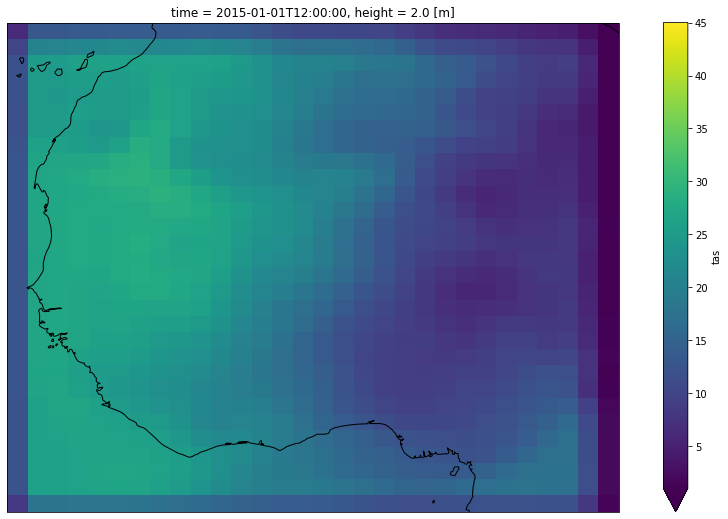

In [217]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_gfdl585_conserve_era5.tas.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=45);
ax.coastlines()

In [218]:
# Save datasets

scen585_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_qm_conser-nointerp_20150101-21001231.nc')

scenQDM585_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_qdm_conser-nointerp_20150101-21001231.nc')

scenDQM585_out.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_dqm_conser-nointerp_20150101-21001231.nc')

ds_gfdl585_conserve_era5.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_qm_conser-conservative_20150101-21001231.nc')

ds_gfdl585_conserve_era5_QDM.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_qdm_conser-conservative_20150101-21001231.nc')

ds_gfdl585_conserve_era5_DQM.to_netcdf(
    '/mnt/project/output/gfdl_bcsd/tas_day_GFDL-ESM4_ssp585_dqm_conser-conservative_20150101-21001231.nc')